In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
corporaFolder = "corpora/"

In [2]:
import gzip
import shutil
import re
import time
import warnings
import os

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# (OLD) Initial idiom/corpus testing

## OLD HC Corpus

### Description

Type:
0:Twitter or similar
1:Daily Newspapers (online version)
2:Weekly or Monthly Magazine
3:Blogs

Subjects:
0:No subject
1:Politics
2:Environment
3:Food
4:Arts & Culture
5:Crime & Law
6:International News (compared to the nation of the language)
7:Local news
8:Lifestyle & Fashion
9:Religion
10:Business & Economy
11:Science & Technology
12:Sport
13:Entertainment
14:Weather
15:Travel
16:Education
17:Health
18:Family
19:WWII
20:Holidays (Christmas, Hannukkah, Ramadan, etc.)
21:Recipes
22:Home & Garden
23:Transport
24:Obituaries
25:Armed Forces
26:Emergency & Disaster
27:Leisure Time (hobbies, etc.)
28;my life (blogs) - specific categories for blog posts about "my life"

### Data cleaning

In [4]:
hcNews = corporaFolder + 'hc_corpus/Eng_US_Newspapers.txt'
#hcNewsSmall = corporaFolder + 'hc_corpus/hc_news_small.txt'
hcBlogs = corporaFolder + 'hc_corpus/Eng_US_Blogs.txt'
hcTwitter = corporaFolder + 'hc_corpus/Eng_US_Twitter.txt'

#### Testing with News corpus

Read into pandas dataframe. Entries are separated by tab characters. Text may contain quote characters. Sample line:

`latimes.com	2012/04/29	1	7,12	He wasn't home alone, apparently.`

In [5]:
column_names = ['website', 'date', 'type', 'subject', 'text']
dfNews = pd.read_csv(hcNews, sep='\t', names=column_names, dtype=str)
dfNews.head()

,website,date,type,subject,text
0,latimes.com,2012/04/29,1,"7,12","He wasn't home alone, apparently."
1,stltoday.com,2011/07/10,1,"7,10",The St. Louis plant had to close. It would die...
2,freep.com,2012/05/07,1,10,WSU's plans quickly became a hot topic on loca...
3,nj.com,2011/02/05,1,1,The Alaimo Group of Mount Holly was up for a c...
4,sacbee.com,2011/10/02,1,5,And when it's often difficult to predict a law...


In [6]:
dfNews.shape

(1000105, 5)

In [7]:
dfNews.describe()

,website,date,type,subject,text
count,1000105,1000105,1000105,1000105,1000105
unique,31,2273,1,3412,1000074
top,cleveland.com,2012/05/02,1,0,Authority Song
freq,151188,32620,1000105,166460,2


In [8]:
dfNews['words'] = dfNews['text'].apply(lambda x: len(x.split()))

In [9]:
dfNews['words'].describe()

count    1.000105e+06
mean     3.440839e+01
std      2.493637e+01
min      1.000000e+00
25%      1.900000e+01
50%      3.100000e+01
75%      4.500000e+01
max      1.792000e+03
Name: words, dtype: float64

In [10]:
dfNews['words'].sum()

34412000

In [11]:
dfNews = dfNews.drop(columns=["type"])   # Everything in the News category has type 1
dfNews['date'] = pd.to_datetime(dfNews['date'], format='%Y/%m/%d')
dfNews['year'] = dfNews['date'].dt.year
dfNews = dfNews.drop(columns=["date"])
dfNews['subject'] = dfNews['subject'].apply(lambda x: [int(i) for i in x.split(',')] if pd.notna(x) else [])

In [12]:
dfNews.head()

,website,subject,text,words,year
0,latimes.com,"[7, 12]","He wasn't home alone, apparently.",5,2012
1,stltoday.com,"[7, 10]",The St. Louis plant had to close. It would die...,29,2011
2,freep.com,[10],WSU's plans quickly became a hot topic on loca...,29,2012
3,nj.com,[1],The Alaimo Group of Mount Holly was up for a c...,85,2011
4,sacbee.com,[5],And when it's often difficult to predict a law...,40,2011


In [13]:
dfNews['year'].value_counts()

year
2012    537993
2011    261364
2010    121826
2009     41759
2008     17728
2007      8607
2006      6997
2005      3831
Name: count, dtype: int64

#### FINAL: Read in datasets (to Pandas DataFrame)

In [5]:
def read_hc_corpus(hcFile):
    column_names = ['website', 'date', 'type', 'subject', 'text']
    df = pd.read_csv(hcFile, sep='\t', names=column_names, dtype=str)

    df['words'] = df['text'].apply(lambda x: len(x.split()))
    total_words = df['words'].sum()
    
    df = df.drop(columns=["type"])   # Everything in the News category has type 1
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    df['year'] = df['date'].dt.year
    df = df.drop(columns=["date"])
    df['subject'] = df['subject'].apply(lambda x: [int(i) for i in x.split(',')] if pd.notna(x) else [])

    print(f"{hcFile}")
    print(f"{color.BOLD}{total_words/1000000:.3f} million words{color.END}")
    print(f"{color.BOLD}{df.shape[0]/1000000:.3f} million lines{color.END} {color.BOLD}({total_words/df.shape[0]:.1f} words per line){color.END}")
    
    return df

In [6]:
dfNews = read_hc_corpus(hcNews)

corpora/hc_corpus/Eng_US_Newspapers.txt
34.412 million words
1.000 million lines (34.4 words per line)


In [7]:
dfBlogs = read_hc_corpus(hcBlogs)

corpora/hc_corpus/Eng_US_Blogs.txt
37.417 million words
0.879 million lines (42.6 words per line)


In [8]:
dfTwitter = read_hc_corpus(hcTwitter)

corpora/hc_corpus/Eng_US_Twitter.txt
30.442 million words
2.343 million lines (13.0 words per line)


In [16]:
dfBlogs.head(10)

,website,subject,text,words,year
0,wordpress.com,[0],"In the years thereafter, most of the Oil field...",16,2012
1,blogspot.com,[0],We love you Mr. Brown.,5,2011
2,blogspot.com,[0],Chad has been awesome with the kids and holdin...,140,2012
3,blogspot.com,[0],"so anyways, i am going to share some home deco...",40,2011
4,blogspot.com,[0],With graduation season right around the corner...,111,2011
5,blogspot.com,[0],"If you have an alternative argument, let's hea...",10,2012
6,blogspot.com,[0],"If I were a bear,",5,2012
7,blogspot.com,[0],"Other friends have similar stories, of how the...",56,2007
8,wordpress.com,[0],Although our beloved Cantab can’t claim the in...,45,2011
9,wordpress.com,[0],Peter Schiff: Hard to tell. It will look prett...,137,2012


In [18]:
dfBlogs.at[9,'text']

'Peter Schiff: Hard to tell. It will look pretty bad for most Americans when prices will go way up and they can’t afford to buy stuff. It could also get very bad as far as loss of individual liberty. A lot of people will blame it on capitalism, on freedom, and they will claim we need more government. It could be used as an impetus for more regulation, which would be a disaster, or it could be an impetus to get rid of all the regulation that was causing the problem. But whether we will do the right or the wrong thing here in America, there will be a lot of pain first. We got some serious problems we have to deal with, but we are not dealing with the problems, we only make the problems worse.'

In [12]:
dfTwitter.at[1,'text']

"When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason."

### Exploration in Newspapers dataset

In [194]:
def countIdiom(df, idiomPattern, hcStr = ""):
    with warnings.catch_warnings():
        # Apply a filter to suppress warnings with the specific message
        warnings.filterwarnings(
            "ignore",  # Action to ignore the warning
            category=UserWarning,  # Category of the warning
            message=".*has match groups.*",  # Regex pattern to match the warning message
        )
        dfSub = df[df['text'].str.contains(idiomPattern, regex=True, na=False, flags=re.IGNORECASE)]
    matches = dfSub['text'].str.count(idiomPattern, flags=re.IGNORECASE).sum()
    total_words = df['words'].sum()
    print(f"{hcStr}{color.BOLD}{matches}{color.END} matches ({dfSub.shape[0]} lines) is ({color.BOLD}{matches/total_words*1000000:.3f}{color.END} per million words) for {color.BOLD}{idiomPattern}{color.END}")
    return dfSub

#### Kick the bucket

In [195]:
kickIdiom = r'\bkick(s|ed)? the bucket(s)?\b'
dfNewsSub = countIdiom(dfNews, kickIdiom, hcStr="News: ")

News: 2 matches (2 lines) is (0.058 per million words) for \bkick(s|ed)? the bucket(s)?\b


In [174]:
dfNewsSub

,website,subject,text,words,year
99976,startribune.com,"[3, 13]","In the glitzy Top 40 nightclub world, Aqua tur...",58,2012
342082,stltoday.com,[10],"Do it before you croak, she said, launching th...",30,2012


In [175]:
dfNewsSub.at[99976,'text']

"In the glitzy Top 40 nightclub world, Aqua turning five is almost as big a deal as the Saloon's achievement. That's because most bottle-service clubs kick the bucket about this time (R.I.P. Karma, Spin, Escape, etc.). Aqua is still popping bottles and even offering everyone free drinks from 9 to 11 p.m. Saturday (plus free champagne for women)."

#### Multiple idioms

In [176]:
idioms = [r'\bkick(s|ed)? the buckets?\b',
          r'\bcr(y|ys|ied|ying) over spilled milk\b',
          r'\blame ducks?\b',
          r'\bunder the weather\b',
          r'\bchip on my shoulders?\b']

In [177]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern)

2 matches (2 lines) is (0.058 per million words) for \bkick(s|ed)? the buckets?\b
1 matches (1 lines) is (0.029 per million words) for \bcr(y|ys|ied|ying) over spilled milk\b
20 matches (19 lines) is (0.581 per million words) for \blame ducks?\b
12 matches (12 lines) is (0.349 per million words) for \bunder the weather\b
13 matches (13 lines) is (0.378 per million words) for \bchip on my shoulders?\b


#### Genralizing regex helps

In [178]:
idioms = [r'\bcr(y|ys|ied|ying) over spilled milk\b',
          r'\bcr(y|i)\S* over spilled milk\b']

In [179]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern)

1 matches (1 lines) is (0.029 per million words) for \bcr(y|ys|ied|ying) over spilled milk\b
1 matches (1 lines) is (0.029 per million words) for \bcr(y|i)\S* over spilled milk\b


In [180]:
idioms = [r'\bchip on my shoulders?\b',
          r'\bchip on \w+ shoulders?\b',
          r'\bchip on (\w+\s?){1,3}shoulders?\b']

In [181]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern)

13 matches (13 lines) is (0.378 per million words) for \bchip on my shoulders?\b
49 matches (49 lines) is (1.424 per million words) for \bchip on \w+ shoulders?\b
50 matches (50 lines) is (1.453 per million words) for \bchip on (\w+\s?){1,3}shoulders?\b


In [235]:
idioms = [r'\bsilver lining\b',
          r'\bsilver linings?\b',
          r'silver lining']

In [236]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern)

59 matches (59 lines) is (1.715 per million words) for \bsilver lining\b
63 matches (63 lines) is (1.831 per million words) for \bsilver linings?\b
63 matches (63 lines) is (1.831 per million words) for silver lining


#### "Over your head" across generalizations and contexts

In [221]:
idioms = [r'\bover your head\b',
          r'\bover \w+ head\b',
          r'\bover (\w+ ){1,3}head\b']

In [223]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern, "News: ")

News: 14 matches (14 lines) is (0.407 per million words) for \bover your head\b
News: 204 matches (201 lines) is (5.928 per million words) for \bover \w+ head\b
News: 218 matches (215 lines) is (6.335 per million words) for \bover (\w+ ){1,3}head\b


In [224]:
for idiomPattern in idioms:
    countIdiom(dfBlogs, idiomPattern, "Blogs: ")

Blogs: 32 matches (32 lines) is (0.855 per million words) for \bover your head\b
Blogs: 335 matches (333 lines) is (8.953 per million words) for \bover \w+ head\b
Blogs: 368 matches (365 lines) is (9.835 per million words) for \bover (\w+ ){1,3}head\b


In [225]:
for idiomPattern in idioms:
    countIdiom(dfTwitter, idiomPattern, "Twitter: ")

Twitter: 28 matches (28 lines) is (0.920 per million words) for \bover your head\b
Twitter: 141 matches (141 lines) is (4.632 per million words) for \bover \w+ head\b
Twitter: 159 matches (159 lines) is (5.223 per million words) for \bover (\w+ ){1,3}head\b


#### "Crying over spilled milk" across generalizations and contexts

In [255]:
idioms = [r'\bcr(y|i)(\w*) over spilled milk\b',
          r'\bcr(y|i)(\w*) over spilled\b']

In [256]:
for idiomPattern in idioms:
    countIdiom(dfNews, idiomPattern, "News: ")

News: 1 matches (1 lines) is (0.029 per million words) for \bcr(y|i)(\w*) over spilled milk\b
News: 1 matches (1 lines) is (0.029 per million words) for \bcr(y|i)(\w*) over spilled\b


In [257]:
for idiomPattern in idioms:
    countIdiom(dfBlogs, idiomPattern, "Blogs: ")

Blogs: 3 matches (3 lines) is (0.080 per million words) for \bcr(y|i)(\w*) over spilled milk\b
Blogs: 3 matches (3 lines) is (0.080 per million words) for \bcr(y|i)(\w*) over spilled\b


In [258]:
for idiomPattern in idioms:
    countIdiom(dfTwitter, idiomPattern, "Twitter: ")

Twitter: 5 matches (5 lines) is (0.164 per million words) for \bcr(y|i)(\w*) over spilled milk\b
Twitter: 6 matches (6 lines) is (0.197 per million words) for \bcr(y|i)(\w*) over spilled\b


In [259]:
df_1 = countIdiom(dfTwitter, r'\bcr(y|i)(\w*) over spilled milk\b', "Twitter: ")
df_2 = countIdiom(dfTwitter, r'\bcr(y|i)(\w*) over spilled\b', "Twitter: ")

Twitter: 5 matches (5 lines) is (0.164 per million words) for \bcr(y|i)(\w*) over spilled milk\b
Twitter: 6 matches (6 lines) is (0.197 per million words) for \bcr(y|i)(\w*) over spilled\b


In [260]:
df_1

,website,subject,text,words,year
435806,twitter.com,[0],If the CATTLE on a 1000 hills are HIS.......wh...,23,2012
1162562,twitter.com,[0],Just live your life! Stop crying over spilled ...,9,2012
1238745,twitter.com,[0],“ Momma said don't cry over spilled milk ... K...,13,2012
1464422,twitter.com,[0],I feel good !!!! Can't cry over spilled milk r...,10,2012
1834122,twitter.com,[0],Never cry over spilled milk just pour another ...,9,2012


In [261]:
df_2

,website,subject,text,words,year
203807,twitter.com,[0],Never cried over spilled beer. Why? Cuz I'm st...,10,2012
435806,twitter.com,[0],If the CATTLE on a 1000 hills are HIS.......wh...,23,2012
1162562,twitter.com,[0],Just live your life! Stop crying over spilled ...,9,2012
1238745,twitter.com,[0],“ Momma said don't cry over spilled milk ... K...,13,2012
1464422,twitter.com,[0],I feel good !!!! Can't cry over spilled milk r...,10,2012
1834122,twitter.com,[0],Never cry over spilled milk just pour another ...,9,2012


In [264]:
df_2.iat[0,2]

"Never cried over spilled beer. Why? Cuz I'm still here."

#### Non idiomatic "pigs fly"

In [287]:
idiom = r'\bpigs? fl(y|i)\w*\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    5 matches (3 lines) is (0.145 per million words) for \bpigs? fl(y|i)\w*\b
Blogs:   22 matches (20 lines) is (0.588 per million words) for \bpigs? fl(y|i)\w*\b
Twitter: 14 matches (14 lines) is (0.460 per million words) for \bpigs? fl(y|i)\w*\b


Non-idiomatic usages of "pigs fly"

In [289]:
dfs[0].iat[2,2] # News

'øThis free website explores environmental issues as seen through the eyes of teen cousins Izz and Dex. The clever cartoon characters star in 15 animated episodes where they explore issues that most tweens and teens can relate to. For example, in one called "Pigs Fly," Izz and Dex look at how their breakfast food got to them. Noting that the bacon had been flown in (and thus that "Pigs Fly"), the teens examine how this process uses a lot of gasoline. Kids discover that eating local can also cut down on the need for preservatives and will support local businesses. The brainchild of WGBH Interactive, this site also has games, a blog, downloads and special features like a Carbon Calculator and advice about cancelling unwanted catalogs.'

In [290]:
dfs[1]

,website,subject,text,words,year
18590,blogspot.com,[0],Inside the dough crust was a spatchcock stuffe...,53,2011
61877,blogspot.com,[0],Beetroot pate de fruit were made on a whimsy b...,65,2011
65018,blogspot.com,[0],"If you ever have a bone to pick with someone, ...",46,2011
101911,blogspot.com,[0],"Our vegetables were a tribute to winter, with ...",39,2011
221081,blogspot.com,[0],Our amuse bouche comes in squat glasses (they'...,81,2011
305129,blogspot.com,[0],"There are seven birds in the consomme, Mrs Pig...",16,2011
309101,blogspot.com,[0],Pig Flyin' has smoked the squab breast with ap...,37,2011
316096,wordpress.com,[0],"A few weeks ago, I started a series on voice. ...",92,2012
347981,blogspot.com,[0],"The banana caramel, Pig Flyin' explains, is ma...",50,2011
401211,blogspot.com,[0],The members of our merry dining crew have all ...,75,2011


### Across Newspapers, Blogs, and Twitter

#### Each idiom

In [ ]:
idiom_list = [r'\bchip on (\w+\s?){1,3}shoulders?\b',
             r'\blame ducks?\b',
             r'\baxe to grind\b',
             r'\bfollows? suit\b',
             r'\bplay \w+ card\b',
             r'\bover (\w+ ){1,3}heads?\b',
             r'\blow hanging fruits?\b',
             r'\bdodg(\w+) (\w+ ){0,3}bullets?\b',
             r'\blead foot\b',
             r'\btrigger happy\b',
             r'\bin the cards\b',
             r'\bsilver linings?\b',
             r'\bon paper\b',
             r'\bskin of (\w+ ){1,3}teeth\b',
             r'\bsplit(\w*) hairs?\b',
             r'\bcats? out of the bags?\b',
             r'\ball bark no bite\b',
             r'\bcards on the tables?\b',
             r'\bburn (\w+ ){1,3}bridges?\b',
             r'\b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b',
             r'\bmade of money\b',
             r'\brains? on (\w+ ){1,3}parades?\b',
             r'\bfish(\w+) or cuts? bait\b',
             r'\bcr(y|i)(\w*) over spilled milk\b',
             r'\bchopped liver\b',
             r'\bdrops? of (\w+ ){1,3}hats?\b',
             r'\bpigs? fl(y|i)\w*\b',
             

In [199]:
idiom = r'\bchip on (\w+\s?){1,3}shoulders?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    50 matches (50 lines) is (1.453 per million words) for \bchip on (\w+\s?){1,3}shoulders?\b
Blogs:   15 matches (15 lines) is (0.401 per million words) for \bchip on (\w+\s?){1,3}shoulders?\b
Twitter: 13 matches (13 lines) is (0.427 per million words) for \bchip on (\w+\s?){1,3}shoulders?\b


In [200]:
idiom = r'\blame ducks?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    20 matches (19 lines) is (0.581 per million words) for \blame ducks?\b
Blogs:   11 matches (11 lines) is (0.294 per million words) for \blame ducks?\b
Twitter: 10 matches (10 lines) is (0.328 per million words) for \blame ducks?\b


In [213]:
many = dfs[0][dfs[0]['text'].str.count(idiom, flags=re.IGNORECASE)>1]
many.iat[0,2]

'Lame duck’s becoming so anticlimactic, said Senate Majority Leader Stephen Sweeney (D-Gloucester), who will become Senate president when the new session begins Jan. 12. "There are very important pieces of legislation that are going to move through, but the energy level in past lame ducks seems different." Many bills faded because they would have required new spending without the state revenue to support them, Sweeney said.'

In [214]:
idiom = r'\baxe to grind\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    1 matches (1 lines) is (0.029 per million words) for \baxe to grind\b
Blogs:   22 matches (22 lines) is (0.588 per million words) for \baxe to grind\b
Twitter: 3 matches (3 lines) is (0.099 per million words) for \baxe to grind\b


In [217]:
idiom = r'\bfollows? suit\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    73 matches (73 lines) is (2.121 per million words) for \bfollows? suit\b
Blogs:   49 matches (49 lines) is (1.310 per million words) for \bfollows? suit\b
Twitter: 27 matches (27 lines) is (0.887 per million words) for \bfollows? suit\b


In [218]:
idiom = r'\bplay \w+ card\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    3 matches (3 lines) is (0.087 per million words) for \bplay \w+ card\b
Blogs:   5 matches (5 lines) is (0.134 per million words) for \bplay \w+ card\b
Twitter: 3 matches (2 lines) is (0.099 per million words) for \bplay \w+ card\b


In [252]:
idiom = r'\bover (\w+ ){1,3}heads?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    274 matches (271 lines) is (7.962 per million words) for \bover (\w+ ){1,3}heads?\b
Blogs:   441 matches (437 lines) is (11.786 per million words) for \bover (\w+ ){1,3}heads?\b
Twitter: 184 matches (184 lines) is (6.044 per million words) for \bover (\w+ ){1,3}heads?\b


In [226]:
idiom = r'\blow hanging fruits?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    1 matches (1 lines) is (0.029 per million words) for \blow hanging fruits?\b
Blogs:   1 matches (1 lines) is (0.027 per million words) for \blow hanging fruits?\b
Twitter: 12 matches (12 lines) is (0.394 per million words) for \blow hanging fruits?\b


In [227]:
idiom = r'\bdodg(\w+) (\w+ ){0,3}bullets?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    25 matches (25 lines) is (0.726 per million words) for \bdodg(\w+) (\w+ ){0,3}bullets?\b
Blogs:   18 matches (18 lines) is (0.481 per million words) for \bdodg(\w+) (\w+ ){0,3}bullets?\b
Twitter: 34 matches (34 lines) is (1.117 per million words) for \bdodg(\w+) (\w+ ){0,3}bullets?\b


In [229]:
idiom = r'\blead foot\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    1 matches (1 lines) is (0.029 per million words) for \blead foot\b
Blogs:   2 matches (2 lines) is (0.053 per million words) for \blead foot\b
Twitter: 2 matches (2 lines) is (0.066 per million words) for \blead foot\b


In [230]:
idiom = r'\btrigger happy\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    0 matches (0 lines) is (0.000 per million words) for \btrigger happy\b
Blogs:   5 matches (5 lines) is (0.134 per million words) for \btrigger happy\b
Twitter: 7 matches (7 lines) is (0.230 per million words) for \btrigger happy\b


In [231]:
idiom = r'\bin the cards\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    35 matches (35 lines) is (1.017 per million words) for \bin the cards\b
Blogs:   25 matches (25 lines) is (0.668 per million words) for \bin the cards\b
Twitter: 20 matches (20 lines) is (0.657 per million words) for \bin the cards\b


In [238]:
idiom = r'\bsilver linings?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    63 matches (63 lines) is (1.831 per million words) for \bsilver linings?\b
Blogs:   71 matches (70 lines) is (1.898 per million words) for \bsilver linings?\b
Twitter: 55 matches (55 lines) is (1.807 per million words) for \bsilver linings?\b


In [239]:
idiom = r'\bon paper\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    253 matches (248 lines) is (7.352 per million words) for \bon paper\b
Blogs:   377 matches (364 lines) is (10.076 per million words) for \bon paper\b
Twitter: 134 matches (134 lines) is (4.402 per million words) for \bon paper\b


In [240]:
idiom = r'\bskin of (\w+ ){1,3}teeth\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    4 matches (4 lines) is (0.116 per million words) for \bskin of (\w+ ){1,3}teeth\b
Blogs:   7 matches (7 lines) is (0.187 per million words) for \bskin of (\w+ ){1,3}teeth\b
Twitter: 1 matches (1 lines) is (0.033 per million words) for \bskin of (\w+ ){1,3}teeth\b


In [241]:
idiom = r'\bsplit(\w*) hairs?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    4 matches (4 lines) is (0.116 per million words) for \bsplit(\w*) hairs?\b
Blogs:   9 matches (9 lines) is (0.241 per million words) for \bsplit(\w*) hairs?\b
Twitter: 6 matches (6 lines) is (0.197 per million words) for \bsplit(\w*) hairs?\b


In [243]:
idiom = r'\bcats? out of the bags?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    2 matches (2 lines) is (0.058 per million words) for \bcats? out of the bags?\b
Blogs:   18 matches (18 lines) is (0.481 per million words) for \bcats? out of the bags?\b
Twitter: 5 matches (5 lines) is (0.164 per million words) for \bcats? out of the bags?\b


In [244]:
idiom = r'\ball bark no bite\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    0 matches (0 lines) is (0.000 per million words) for \ball bark no bite\b
Blogs:   0 matches (0 lines) is (0.000 per million words) for \ball bark no bite\b
Twitter: 1 matches (1 lines) is (0.033 per million words) for \ball bark no bite\b


In [246]:
idiom = r'\bcards on the tables?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    8 matches (8 lines) is (0.232 per million words) for \bcards on the tables?\b
Blogs:   5 matches (5 lines) is (0.134 per million words) for \bcards on the tables?\b
Twitter: 4 matches (4 lines) is (0.131 per million words) for \bcards on the tables?\b


In [247]:
idiom = r'\bburn (\w+ ){1,3}bridges?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    2 matches (2 lines) is (0.058 per million words) for \bburn (\w+ ){1,3}bridges?\b
Blogs:   6 matches (6 lines) is (0.160 per million words) for \bburn (\w+ ){1,3}bridges?\b
Twitter: 18 matches (18 lines) is (0.591 per million words) for \bburn (\w+ ){1,3}bridges?\b


In [248]:
idiom = r'\b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    0 matches (0 lines) is (0.000 per million words) for \b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b
Blogs:   1 matches (1 lines) is (0.027 per million words) for \b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b
Twitter: 0 matches (0 lines) is (0.000 per million words) for \b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b


In [249]:
dfs[1].iat[0,2]

'This phrase has been common in my family forever. I have heard it since I was little and it is easily understandable. But since I have moved to Iowa for college I have started to notice that everyone is confused when I say it. I will often here “six of one half dozen of the other” coming from people instead. This phrase is completely lost by me, I understand it but can never remember the correct words or how they are organized in the phrase.'

In [250]:
idiom = r'\bmade of money\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    0 matches (0 lines) is (0.000 per million words) for \bmade of money\b
Blogs:   4 matches (4 lines) is (0.107 per million words) for \bmade of money\b
Twitter: 7 matches (7 lines) is (0.230 per million words) for \bmade of money\b


In [251]:
idiom = r'\brains? on (\w+ ){1,3}parades?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    6 matches (6 lines) is (0.174 per million words) for \brains? on (\w+ ){1,3}parades?\b
Blogs:   6 matches (6 lines) is (0.160 per million words) for \brains? on (\w+ ){1,3}parades?\b
Twitter: 27 matches (27 lines) is (0.887 per million words) for \brains? on (\w+ ){1,3}parades?\b


In [253]:
idiom = r'\bfish(\w+) or cuts? bait\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    0 matches (0 lines) is (0.000 per million words) for \bfish(\w+) or cuts? bait\b
Blogs:   0 matches (0 lines) is (0.000 per million words) for \bfish(\w+) or cuts? bait\b
Twitter: 0 matches (0 lines) is (0.000 per million words) for \bfish(\w+) or cuts? bait\b


In [254]:
idiom = r'\bcr(y|i)(\w*) over spilled milk\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    1 matches (1 lines) is (0.029 per million words) for \bcr(y|i)(\w*) over spilled milk\b
Blogs:   3 matches (3 lines) is (0.080 per million words) for \bcr(y|i)(\w*) over spilled milk\b
Twitter: 5 matches (5 lines) is (0.164 per million words) for \bcr(y|i)(\w*) over spilled milk\b


In [265]:
idiom = r'\bchopped liver\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    7 matches (7 lines) is (0.203 per million words) for \bchopped liver\b
Blogs:   3 matches (3 lines) is (0.080 per million words) for \bchopped liver\b
Twitter: 19 matches (19 lines) is (0.624 per million words) for \bchopped liver\b


In [266]:
idiom = r'\bdrops? of (\w+ ){1,3}hats?\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    3 matches (3 lines) is (0.087 per million words) for \bdrops? of (\w+ ){1,3}hats?\b
Blogs:   30 matches (30 lines) is (0.802 per million words) for \bdrops? of (\w+ ){1,3}hats?\b
Twitter: 9 matches (9 lines) is (0.296 per million words) for \bdrops? of (\w+ ){1,3}hats?\b


In [286]:
idiom = r'\bpigs? fl(y|i)\w*\b'
corpora = [dfNews, dfBlogs, dfTwitter]
hcStrs = ["News:    ", "Blogs:   ", "Twitter: "]
dfs = [countIdiom(df, idiom, hcStr=hcStr) for df,hcStr in zip(corpora,hcStrs)]

News:    5 matches (3 lines) is (0.145 per million words) for \bpigs? fl(y|i)\w*\b
Blogs:   22 matches (20 lines) is (0.588 per million words) for \bpigs? fl(y|i)\w*\b
Twitter: 14 matches (14 lines) is (0.460 per million words) for \bpigs? fl(y|i)\w*\b


Use [this paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/90255/3588398.pdf?sequence) for new idioms

#### All idioms

In [5]:
idiom_list = [r'\bchip on (\w+\s?){1,3}shoulders?\b',
             r'\blame ducks?\b',
             r'\baxe to grind\b',
             r'\bfollows? suit\b',
             r'\bplay \w+ card\b',
             r'\bover (\w+ ){1,3}heads?\b',
             r'\blow hanging fruits?\b',
             r'\bdodg(\w+) (\w+ ){0,3}bullets?\b',
             r'\blead foot\b',
             r'\btrigger happy\b',
             r'\bin the cards\b',
             r'\bsilver linings?\b',
             r'\bon paper\b',
             r'\bskin of (\w+ ){1,3}teeth\b',
             r'\bsplit(\w*) hairs?\b',
             r'\bcats? out of the bags?\b',
             r'\ball bark no bite\b',
             r'\bcards on the tables?\b',
             r'\bburn (\w+ ){1,3}bridges?\b',
             r'\b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b',
             r'\bmade of money\b',
             r'\brains? on (\w+ ){1,3}parades?\b',
             r'\bfish(\w+) or cuts? bait\b',
             r'\bcr(y|i)(\w*) over spilled milk\b',
             r'\bchopped liver\b',
             r'\bdrops? of (\w+ ){1,3}hats?\b',
             r'\bpigs? fl(y|i)\w*\b']

In [39]:
def countIdiomEfficient(df, idiomPattern):
    with warnings.catch_warnings():
        # Apply a filter to suppress warnings with the specific message
        warnings.filterwarnings(
            "ignore",  # Action to ignore the warning
            category=UserWarning,  # Category of the warning
            message=".*has match groups.*",  # Regex pattern to match the warning message
        )
        dfSub = df[df['text'].str.contains(idiomPattern, regex=True, na=False, flags=re.IGNORECASE)]
    total_matches = dfSub['text'].str.count(idiomPattern, flags=re.IGNORECASE).sum()
    #total_words = df['words'].sum()
    #print(f"{hcStr}{color.BOLD}{total_matches}{color.END} matches ({dfSub.shape[0]} lines) is ({color.BOLD}{total_matches/total_words*1000000:.3f}{color.END} per million words) for {color.BOLD}{idiomPattern}{color.END}")
    return total_matches

In [51]:
corpora = [dfNews, dfBlogs, dfTwitter]
corpora_word_counts = [df['words'].sum() for df in corpora]

print(f"{color.BOLD}Testing {len(idiom_list)} idioms{color.END}")

all_idioms_search_results = []
for idiom in idiom_list:
    print(f"{len(all_idioms_search_results)}: Testing {color.BOLD}{idiom}{color.END}...", end="")
    matches_row = [countIdiomEfficient(df, idiom) for df in corpora]
    frequency_row = [matches / word_count * 1000000 for (matches, word_count) in zip(matches_row, corpora_word_counts)]
    all_idioms_search_results.append(frequency_row)
    print(f"\tAverage {color.BOLD}{sum(frequency_row)/3:.3f}{color.END} matches per million words  (News: {frequency_row[0]:.3f}  |  Blogs: {frequency_row[1]:.3f}  |  Twitter: {frequency_row[2]:.3f})")

Testing 27 idioms
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	Average 0.760 matches per million words  (News: 1.453  |  Blogs: 0.401  |  Twitter: 0.427)
1: Testing \blame ducks?\b...	Average 0.401 matches per million words  (News: 0.581  |  Blogs: 0.294  |  Twitter: 0.328)
2: Testing \baxe to grind\b...	Average 0.239 matches per million words  (News: 0.029  |  Blogs: 0.588  |  Twitter: 0.099)
3: Testing \bfollows? suit\b...	Average 1.439 matches per million words  (News: 2.121  |  Blogs: 1.310  |  Twitter: 0.887)
4: Testing \bplay \w+ card\b...	Average 0.106 matches per million words  (News: 0.087  |  Blogs: 0.134  |  Twitter: 0.099)
5: Testing \bover (\w+ ){1,3}heads?\b...	Average 8.598 matches per million words  (News: 7.962  |  Blogs: 11.786  |  Twitter: 6.044)
6: Testing \blow hanging fruits?\b...	Average 0.150 matches per million words  (News: 0.029  |  Blogs: 0.027  |  Twitter: 0.394)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	Average 0.775 matches per million words  (

In [52]:
frequency_df = pd.DataFrame(all_idioms_search_results, columns=["News", "Blogs", "Twitter"], index=idiom_list)

In [55]:
frequency_df['Average'] = frequency_df[["News", "Blogs", "Twitter"]].mean(axis=1)

In [57]:
frequency_df.head()

,News,Blogs,Twitter,Average
"\bchip on (\w+\s?){1,3}shoulders?\b",1.452982,0.400891,0.427041,0.760304
\blame ducks?\b,0.581193,0.293987,0.328493,0.401224
\baxe to grind\b,0.029060,0.587973,0.098548,0.238527
\bfollows? suit\b,2.121353,1.309576,0.886932,1.439287
\bplay \w+ card\b,0.087179,0.133630,0.098548,0.106452


In [67]:
frequency_df.describe()

,News,Blogs,Twitter,Average
count,27.000000,27.000000,27.000000,27.000000
mean,0.905154,1.144271,0.754318,0.934581
std,2.032364,2.862991,1.369844,2.071889
min,0.000000,0.000000,0.000000,0.000000
25%,0.029060,0.093541,0.114973,0.112170
50%,0.116239,0.187082,0.295644,0.238527
75%,0.653842,0.587973,0.640562,0.583760
max,7.962339,11.786188,6.044274,8.597600


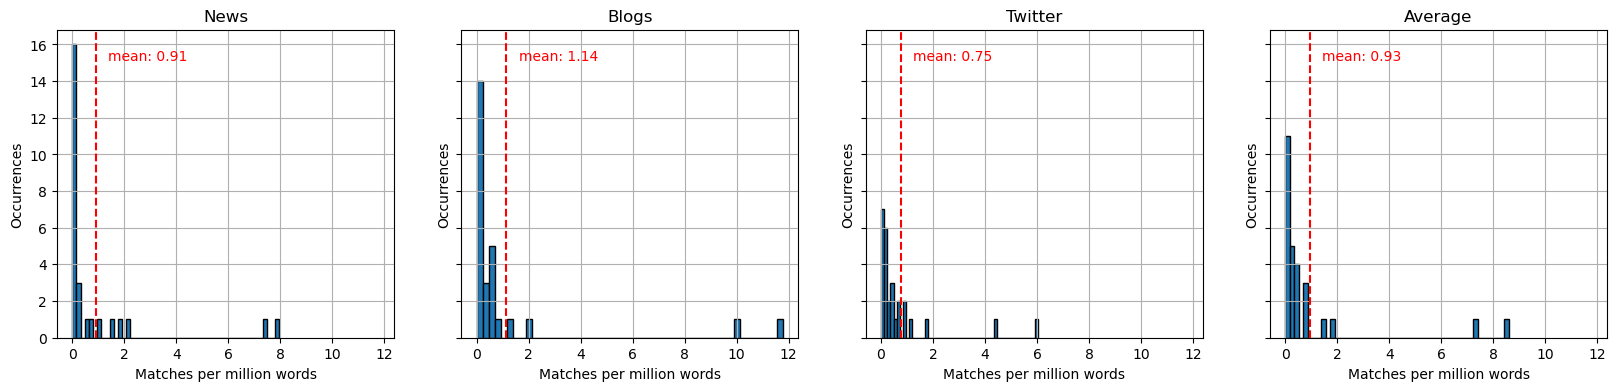

In [82]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True, sharex=True)

for i, source in enumerate(["News", "Blogs", "Twitter", "Average"]):
    axes[i].hist(frequency_df[source], bins=50, edgecolor="black")
    source_mean = frequency_df[source].mean()
    axes[i].set_xlabel("Matches per million words")
    axes[i].set_ylabel("Occurrences")
    axes[i].set_title(source)
    axes[i].grid()
    axes[i].axvline(source_mean, color="red", linestyle="dashed")
    axes[i].text(source_mean + 2, 0.9 * axes[i].get_ylim()[1], f'mean: {source_mean:.2f}', color='red', ha='center')

In [87]:
### Realized doing a combined histogram is somewhat meaningless since entries vary over both source *and* idiom; they only vary over idiom in the above plots
# combined_values = pd.concat([frequency_df['News'], frequency_df['Blogs'], frequency_df['Twitter']])
# fig, ax = plt.subplots(figsize=(5,4))
# ax.hist(combined_values, bins=50, edgecolor="black")
# source_mean = combined_values.mean()
# ax.set_xlabel("Matches per million words")
# ax.set_ylabel("Occurrences")
# ax.set_title("Collectively")
# ax.grid()
# ax.axvline(source_mean, color="red", linestyle="dashed")
# ax.text(source_mean + 2, 0.9 * ax.get_ylim()[1], f'mean: {source_mean:.2f}', color='red', ha='center')

In [93]:
frequency_df[(frequency_df["News"] > 4) | (frequency_df["Blogs"] > 4) | (frequency_df["Twitter"] > 4)]

,News,Blogs,Twitter,Average
"\bover (\w+ ){1,3}heads?\b",7.962339,11.786188,6.044274,8.597600
\bon paper\b,7.352086,10.075721,4.401809,7.276539


#### TLDR

* Tested 27 idioms over ~100 million words
    * ...using regular expression (likely overcounts occurrences)
* On average, an idioms occurs **0.93 times for every million words searched**
    * **0.91 in News articles** (~34.4 million words)
    * **1.14 in Blogs** (~37.4 million words)
    * **0.75 in Twitter posts** (~30.4 million words)
* Most idioms occurred infrequently
    * A few occurring much more frequently (skewing the mean)
    * Specifically, **"over one's head"** and **"on paper"** occurred much more frequently, with an average of **8.6** and **7.3** occurrences per million words, respectively

# *Formal read in of corpora*

## Helper Functions

In [4]:
def standardizeQuotes(textString):
    """
    Replaces variations of the apostrophe and quotation mark with a standard version (' and ").
    Used in "preprocessThisText" functions.
    """
    textString = re.sub(r"’", "'", textString) # Right single quotation mark
    textString = re.sub(r"‘", "'", textString) # Left single quotation mark
    textString = re.sub(r"′", "'", textString) # Prime
    textString = re.sub(r"ʼ", "'", textString) # Modifier letter apostrophe

    textString = re.sub(r'“', '"', textString) # Left double quotation mark
    textString = re.sub(r'”', '"', textString) # Right double quotation mark
    textString = re.sub(r'″', '"', textString) # Double prime
    textString = re.sub(r'„', '"', textString) # Low-9 quotation mark

    return textString

In [5]:
def removeQuotes(textString):
    """
    Removes (standardized) single and double quotes.
    """
    textString = re.sub(r'"', '', textString)
    textString = re.sub(r"'", '', textString)
    return textString

In [6]:
def calcCorpusSize(corpusTexts):
    """
    Calculates the total words in a corpus by splitting based on whitespace.

    Args:
        corpusTexts (list[string]): Corpus

    Returns:
        int: number of words in corpus
    """
    i=0
    for text in corpusTexts:
        i += len(re.findall(r'\s+', text))
    return i

In [7]:
def testIdiomOnCorpus(corpusTexts, idiomPattern):
    """
    Locates, records, and returns all occurrences of an idiom regex in a corpus.

    Args:
        corpusTexts (list[string]): Corpus to be searched
        idiomPattern (raw string): Idiom regex. Uses python's "re" module. i.e. r'\bidioms?'

    Returns:
        matchList (list[string]): list of the identified matches
        indexList (list[int]): corresponding list of indices identifying which corpus string the match was found in
    """
    matchList = []
    indexList = []
    for i,text in enumerate(corpusTexts):
        newMatches = re.findall(idiomPattern, text)
        matchList += newMatches
        indexList += [i]*len(newMatches)
    return matchList, indexList

In [8]:
def testCorpus(corpusTexts, idiom_list, corpusName="UNKNOWN"):
    """
    For a corpus, identifies number of matches over a list of idioms.

    Args:
        idiom_list (list[raw string]): list of idiom regexs to test
        corpusTexts (list[string]): Corpus to be searched
        corpusName (string, optional): For printing, name of corpus

    Returns:
        num_matches_list (list[int]): list (size of idiom_list) of idiom match counts
        freq_matches_list (list[float]): list (size of idiom_list) of raw counts normalized by total words in corpus
    """
    print(f"Testing {color.YELLOW}{len(idiom_list)}{color.END} idioms on {color.BLUE}{corpusName}{color.END} corpus | ", end="")
    corpusSize = calcCorpusSize(corpusTexts)
    print(f"{color.BLUE}{corpusSize/1000000:.2f}M{color.END} words")
    
    num_matches_list = []
    freq_matches_list = []
    for i,idiom in enumerate(idiom_list):
        print(f"{i:>3}: Testing {color.YELLOW}{idiom:<50}{color.END} | ", end="")
        start_time = time.time()
        matchList, indexList = testIdiomOnCorpus(corpusTexts, idiom)
        end_time = time.time() - start_time
        num_matches_list.append(len(matchList))
        freq = len(matchList)/corpusSize * 1000000
        freq_matches_list.append(freq)
        print(f"{color.DARKCYAN}{end_time:>3.2f} seconds{color.END} | {color.RED}{len(matchList):>4}{color.END} matches ({color.RED}{freq:>6.3f}{color.END} per million words)")
    return num_matches_list, freq_matches_list

In [9]:
def histCorpusMatches(num_matches_list, freq_matches_list, corpusSize, corpusName="UNKNOWN"):
    """
    For a particular corpus, plots histograms of idiom match counts, unnormalized and normalized.

    Args:
        num_matches_list (list[int]): list of raw idiom match counts
        freq_matches_list (list[float]): list of normalized match counts
        corpusSize (int): For display purposes, total words in corpus
        corpusName (string, optional): For display purposes, name of corpus
    """
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    fig.suptitle(f"Idiom matches in {corpusName} corpus ({corpusSize/1000000:.2f}M words)")

    # Histogram of raw idiom match counts
    axes[0].hist(num_matches_list, bins=50, edgecolor="black")
    num_matches_mean = sum(num_matches_list)/len(num_matches_list)
    axes[0].set_xlabel("Matches")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Raw match counts")
    axes[0].grid()
    axes[0].axvline(num_matches_mean, color="red", linestyle="dashed")
    axes[0].text(num_matches_mean + 0.2 * axes[0].get_xlim()[1], 0.9 * axes[0].get_ylim()[1], f'mean: {num_matches_mean:.2f}', color='red', ha='center')

    # Histogram of normalized idiom match counts
    axes[1].hist(freq_matches_list, bins=50, edgecolor="black")
    freq_matches_mean = sum(freq_matches_list)/len(freq_matches_list)
    axes[1].set_xlabel("Matches per million words")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("Normalized match counts")
    axes[1].grid()
    axes[1].axvline(freq_matches_mean, color="red", linestyle="dashed")
    axes[1].text(freq_matches_mean + 0.2 * axes[1].get_xlim()[1], 0.9 * axes[1].get_ylim()[1], f'mean: {freq_matches_mean:.2f}', color='red', ha='center')

## **Open American National Corpus**

### Description

* [OANC Contents](https://anc.org/data/oanc/contents/#switchboard)
* 14.6M words
    * 3.2M spoken
    * 11.4M written
* Spoken text categories:
    * Telephone:
        * switchboard (3.0M) (transcriptions of many (labeled!) spontaneous conversations)
    * Face-to-face:
        * charlotte (0.2M) (interviews with residents of a SC county)
* Written text categories:
    * Journal:
        * slate (4.2M) (general magazine)
        * verbatim (0.6M) (*linguistics* magazine)
    * Technical:
        * biomed (3.3M) (academic papers)
        * government (1.0M) (conference proceedings)
        * plos (0.4M) (academic literature)
        * 9/11 report (0.3M) (gov. report on terrorists)
    * Travel guides:
        * berlitz (1.0M) (travel guides for Americans)
    * Letters:
        * icic (0.1M) (philanthropic fundraising texts)
    * Fiction:
        * eggan (0.06M) (single novel)
    * Non-fiction:
        * oup (0.3M) (various non-fiction pieces from Oxford University Press)

### Switchboard corpus

Clean data

In [10]:
switchboardDir = corporaFolder + "anc/data/spoken/telephone/switchboard/"

In [11]:
def preprocessSwitchboardText(textString):
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\n\s*', '. ', textString)
    textString = re.sub(r'\s+', ' ', textString)
    textString = re.sub(r'^.? ', '', textString)
    textString = re.sub(r' $', '', textString)
    textString = textString.lower()
    return textString

In [12]:
switchboardTexts = []
switchboardDirlist = []
for folder in os.listdir(switchboardDir):
    folderPath = os.path.join(switchboardDir, folder)
    for filename in os.listdir(folderPath):
        if filename.endswith(".txt"):
            filePath = os.path.join(folderPath, filename)
            switchboardDirlist.append(filePath)
            with open(filePath, 'r', encoding='utf-8') as f:
                text = f.read()
                text = preprocessSwitchboardText(text)
                switchboardTexts.append(text)
switchboard_size = calcCorpusSize(switchboardTexts)
print(f"{color.BOLD}{switchboard_size}{color.END} words in switchboard corpus")

2904961 words in switchboard corpus


In [15]:
# Sample text after being cleaned
switchboardTexts[0]

'okay hi. hi um yeah id like to talk about how you dress for work and and um what do you normally what type of outfit do you normally have to wear. well i work in uh corporate control so we have to dress kind of nice so i usually wear skirts and sweaters in the winter time slacks i guess and in the summer just dresses. um-hum. we cant even well were not even really supposed to wear jeans very often. so it really doesnt vary that much from season to season since the office is kind of you know always the same temperature. and is. right right is there is there um any is there a like a code of dress where you work do they ask. so. not formally. right. but its kind of understood that were supposed to dress a little bit nice a lot of times we have to go over to uh like jerry junkins office and bill ellsworths office to deliver stuff. right. and we prepare a lot of foils for marvin and bill so we have to dress a little bit nice were not. right right and does it does it change i guess um you c

Test idioms in corpus

In [16]:
switchboard_results = testCorpus(switchboardTexts, idiom_list, "SWITCHBOARD")

Testing 27 idioms on SWITCHBOARD corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	0 matches (0.000 per million words)
1: Testing \blame ducks?\b...	1 matches (0.344 per million words)
2: Testing \baxe to grind\b...	4 matches (1.377 per million words)
3: Testing \bfollows? suit\b...	1 matches (0.344 per million words)
4: Testing \bplay \w+ card\b...	0 matches (0.000 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	24 matches (8.262 per million words)
6: Testing \blow hanging fruits?\b...	0 matches (0.000 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	0 matches (0.000 per million words)
8: Testing \blead foot\b...	2 matches (0.688 per million words)
9: Testing \btrigger happy\b...	0 matches (0.000 per million words)
10: Testing \bin the cards\b...	1 matches (0.344 per million words)
11: Testing \bsilver linings?\b...	0 matches (0.000 per million words)
12: Testing \bon paper\b...	14 matches (4.819 per million words)
13: Testing \bskin of (\w+ ){1,3}

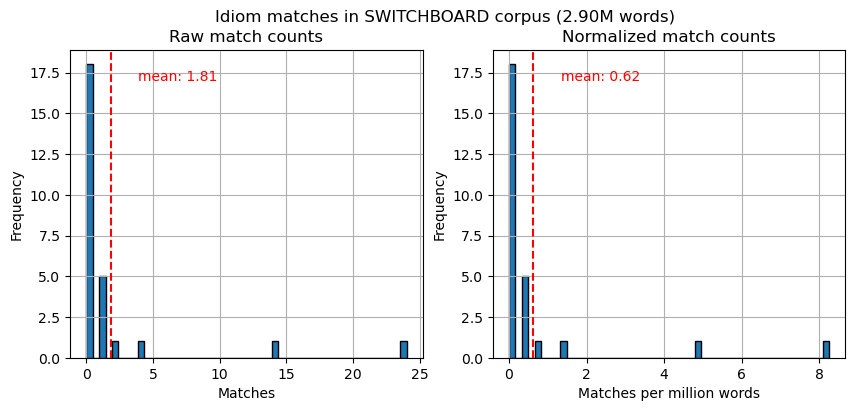

In [17]:
histCorpusMatches(*switchboard_results, switchboard_size, corpusName="SWITCHBOARD")

### Slate corpus

In [13]:
slateDir = corporaFolder + "anc/data/written_1/journal/slate/"

In [14]:
def preprocessSlateText(textString):
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\s*\n\s*\n\s*', '. ', textString)
    textString = re.sub(r'\.\.', '.', textString)
    textString = re.sub(r'\s+', ' ', textString)
    textString = re.sub(r'^\s*.?\s*', '', textString)
    textString = re.sub(r'\s*$', '', textString)
    textString = re.sub(r' ,', ',', textString)
    textString = re.sub(r' \.', '.', textString)
    textString = textString.lower()
    return textString

In [15]:
slateTexts = []
slateDirlist = []
for folder in os.listdir(slateDir):
    folderPath = os.path.join(slateDir, folder)
    for filename in os.listdir(folderPath):
        if filename.endswith(".txt"):
            filePath = os.path.join(folderPath, filename)
            slateDirlist.append(filePath)
            with open(filePath, 'r', encoding='utf-8') as f:
                text = f.read()
                text = preprocessSlateText(text)
                slateTexts.append(text)
slate_size = calcCorpusSize(slateTexts)
print(f"{color.BOLD}{slate_size}{color.END} words in slate corpus")

4179920 words in slate corpus


In [20]:
# Sample of cleaned data
slateTexts[0]

'harmonic convergences. youre right, maxims strong point is that its totally unsentimental and ungenteel. its a sendup of the old model, but in a different way than, say, hustler was, and the difference (surprise) reflects the sexual culture of the 90s. with its belligerent grossness and misogyny, hustler rebelled against the establishment mens mags class condescension, the earnest philosophizing about the sexual revolution, the thinking mens sex bomb syndrome, at the same time that it was deliberately goading feminists. it came right out with the anger that the regular mens mags tried to hide. maxim pokes fun at its progenitors but with considerable ironic affection. its not angry. in fact, while its fondness for the most idiotic, juvenile humor knows no bounds, any strong emotion is taboo (unless you count horror at having your penis mangled)--thats part of the british influence, i guess. and feminism isnt an issue, at least not directly--partly because its basic ideas have been assi

In [21]:
slate_results = testCorpus(slateTexts, idiom_list, "SLATE")

Testing 27 idioms on SLATE corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	1 matches (0.239 per million words)
1: Testing \blame ducks?\b...	20 matches (4.785 per million words)
2: Testing \baxe to grind\b...	0 matches (0.000 per million words)
3: Testing \bfollows? suit\b...	13 matches (3.110 per million words)
4: Testing \bplay \w+ card\b...	0 matches (0.000 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	30 matches (7.177 per million words)
6: Testing \blow hanging fruits?\b...	1 matches (0.239 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	3 matches (0.718 per million words)
8: Testing \blead foot\b...	0 matches (0.000 per million words)
9: Testing \btrigger happy\b...	0 matches (0.000 per million words)
10: Testing \bin the cards\b...	3 matches (0.718 per million words)
11: Testing \bsilver linings?\b...	12 matches (2.871 per million words)
12: Testing \bon paper\b...	74 matches (17.704 per million words)
13: Testing \bskin of (\w+ ){1,3}te

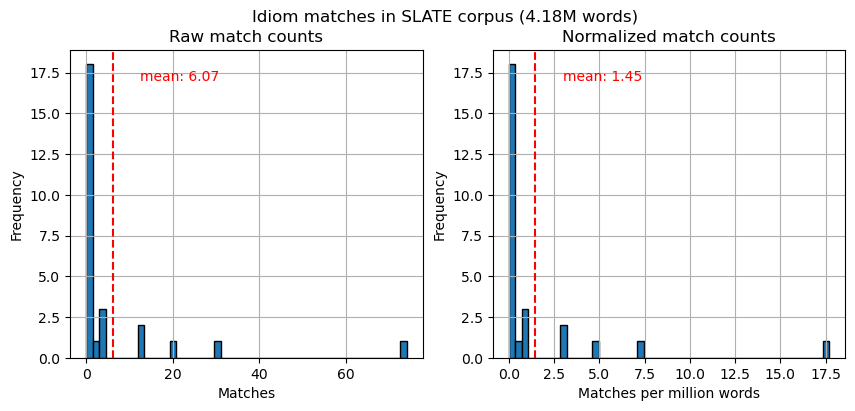

In [22]:
histCorpusMatches(*slate_results, slate_size, corpusName="SLATE")

### Biomed corpus

In [16]:
biomedDir = corporaFolder + "anc/data/written_2/technical/biomed/"

In [17]:
def preprocessBiomedText(textString):
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\[[\s\d]*\]', '', textString) # Lots of citations "[ 1 3 4 7]" which we remove
    textString = re.sub(r'\s+', ' ', textString)
    textString = re.sub(r'^\s*', '', textString)
    textString = re.sub(r'\s*$', '', textString)
    textString = re.sub(r' ,', ',', textString)
    textString = re.sub(r' \.', '.', textString)
    textString = textString.lower()
    return textString

In [18]:
biomedTexts = []
biomedDirlist = []
for filename in os.listdir(biomedDir):
    if filename.endswith(".txt"):
        filePath = os.path.join(biomedDir, filename)
        biomedDirlist.append(filePath)
        with open(filePath, 'r', encoding='utf-8') as f:
            text = f.read()
            text = preprocessBiomedText(text)
            biomedTexts.append(text)
biomed_size = calcCorpusSize(biomedTexts)
print(f"{color.BOLD}{biomed_size}{color.END} words in biomed corpus")

3318142 words in biomed corpus


In [26]:
# Sample of cleaned biomed text
biomedTexts[0]

'introduction older adults are frequently counseled to lose weight, even though there is little evidence that overweight is associated with increased mortality in those over age 65. six large controlled population-based studies of non-smoking older adults have investigated the association between body mass index (bmi) and mortality, controlling for relevant covariates. all studies found excess risk for persons with very low bmi, but that persons with moderately high bmi had little or no extra risk except in certain small subsets. a review of 13 studies of older adults drew similar conclusions. many healthy older adults report gradual weight gain throughout adult life. it may be that a small amount of gradual weight gain is normative and associated with the most robust health as we age. it has been suggested that weight standards be adjusted upwards for age. such recommendations remain controversial, however, because the number of studies of older persons is fairly small, and because fe

In [27]:
biomed_results = testCorpus(biomedTexts, idiom_list, "BIOMED")

Testing 27 idioms on BIOMED corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	0 matches (0.000 per million words)
1: Testing \blame ducks?\b...	0 matches (0.000 per million words)
2: Testing \baxe to grind\b...	0 matches (0.000 per million words)
3: Testing \bfollows? suit\b...	0 matches (0.000 per million words)
4: Testing \bplay \w+ card\b...	0 matches (0.000 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	1 matches (0.301 per million words)
6: Testing \blow hanging fruits?\b...	0 matches (0.000 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	0 matches (0.000 per million words)
8: Testing \blead foot\b...	0 matches (0.000 per million words)
9: Testing \btrigger happy\b...	0 matches (0.000 per million words)
10: Testing \bin the cards\b...	0 matches (0.000 per million words)
11: Testing \bsilver linings?\b...	0 matches (0.000 per million words)
12: Testing \bon paper\b...	0 matches (0.000 per million words)
13: Testing \bskin of (\w+ ){1,3}teeth\b

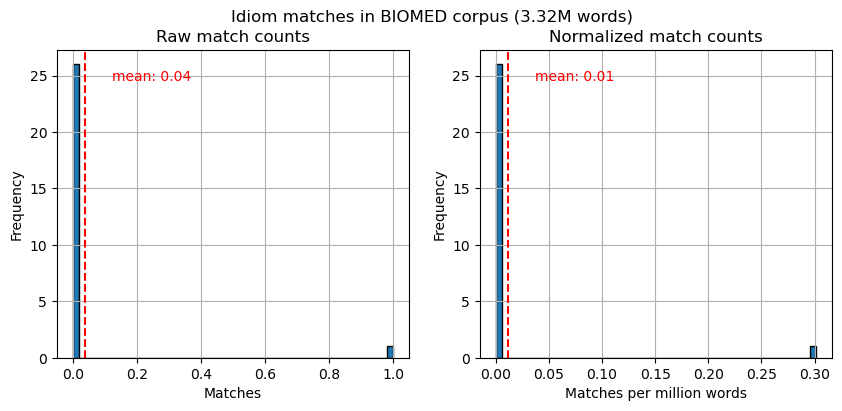

In [28]:
histCorpusMatches(*biomed_results, biomed_size, corpusName="BIOMED")

## **HC corpus**

#### News corpus

In [19]:
newsFile = corporaFolder + 'hc_corpus/Eng_US_Newspapers.txt'

In [20]:
def preprocessNewsText(textString):
    textString = re.search(r'\t[^\t]*\n$', textString).group(0)
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\s+', ' ', textString)
    textString = re.sub(r'^\s*', '', textString)
    textString = re.sub(r'\s*$', '', textString)
    textString = re.sub(r' ,', ',', textString)
    textString = re.sub(r' \.', '.', textString)
    textString = textString.lower()
    return textString

In [21]:
newsTexts = []
with open(newsFile, 'r', encoding='utf-8') as f:
    for line in f:
        text = preprocessNewsText(line)
        newsTexts.append(text)
news_size = calcCorpusSize(newsTexts)
print(f"{color.BOLD}{news_size}{color.END} words in news corpus")

33337987 words in news corpus


In [26]:
# Sample of cleaned news text
newsTexts[3]

'the alaimo group of mount holly was up for a contract last fall to evaluate and suggest improvements to trenton water works. but campaign finance records released this week show the two employees donated a total of $4,500 to the political action committee (pac) partners for progress in early june. partners for progress reported it gave more than $10,000 in both direct and in-kind contributions to mayor tony mack in the two weeks leading up to his victory in the mayoral runoff election june 15.'

In [33]:
news_results = testCorpus(newsTexts, idiom_list, "NEWS")

Testing 27 idioms on NEWS corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	52 matches (1.560 per million words)
1: Testing \blame ducks?\b...	20 matches (0.600 per million words)
2: Testing \baxe to grind\b...	1 matches (0.030 per million words)
3: Testing \bfollows? suit\b...	73 matches (2.190 per million words)
4: Testing \bplay \w+ card\b...	3 matches (0.090 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	311 matches (9.329 per million words)
6: Testing \blow hanging fruits?\b...	1 matches (0.030 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	25 matches (0.750 per million words)
8: Testing \blead foot\b...	1 matches (0.030 per million words)
9: Testing \btrigger happy\b...	0 matches (0.000 per million words)
10: Testing \bin the cards\b...	36 matches (1.080 per million words)
11: Testing \bsilver linings?\b...	63 matches (1.890 per million words)
12: Testing \bon paper\b...	253 matches (7.589 per million words)
13: Testing \bskin of (\w+ ){1,3

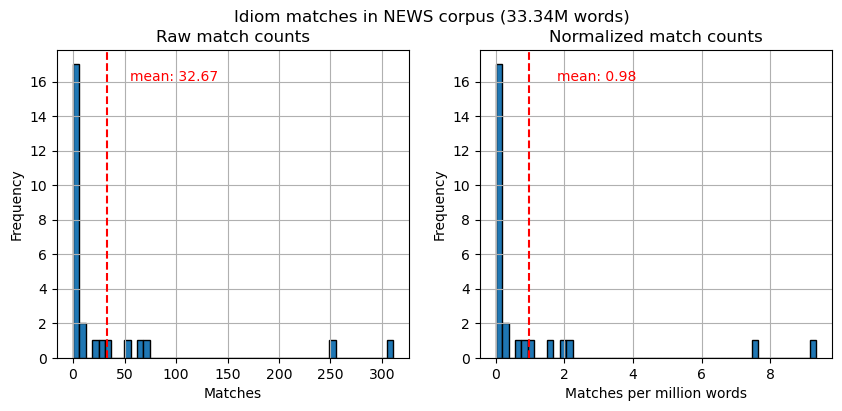

In [34]:
histCorpusMatches(*news_results, news_size, corpusName="NEWS")

#### Blogs corpus

In [22]:
blogsFile = corporaFolder + 'hc_corpus/Eng_US_Blogs.txt'

In [23]:
def preprocessBlogsText(textString):
    textString = re.search(r'\t[^\t]*\n$', textString).group(0)
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\s+', ' ', textString) # Replace spaces, tabs, or newlines with a single space
    textString = re.sub(r'^\s*', '', textString) # Remove leading whitespace
    textString = re.sub(r'\s*$', '', textString) # Remove tailing whitespace
    textString = re.sub(r' ,', ',', textString) # (To make word count more accurate) remove spaces before puncuation
    textString = re.sub(r' \.', '.', textString)
    textString = textString.lower() # Lowercase text
    return textString

In [24]:
blogsTexts = []
with open(blogsFile, 'r', encoding='utf-8') as f:
    for line in f:
        text = preprocessBlogsText(line)
        blogsTexts.append(text)
blogs_size = calcCorpusSize(blogsTexts)
print(f"{color.BOLD}{blogs_size}{color.END} words in blogs corpus")

36412290 words in blogs corpus


In [23]:
# Sample of cleaned blogs text
blogsTexts[7]

'other friends have similar stories, of how they were treated brusquely by laurelwood staff, and as often as not, the same names keep coming up. about a half-dozen friends of mine refuse to step foot in there ever again because of it. how many others theyre telling - and keeping away - one can only guess.'

In [39]:
blogs_results = testCorpus(blogsTexts, idiom_list, "BLOGS")

Testing 27 idioms on BLOGS corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	15 matches (0.412 per million words)
1: Testing \blame ducks?\b...	11 matches (0.302 per million words)
2: Testing \baxe to grind\b...	22 matches (0.604 per million words)
3: Testing \bfollows? suit\b...	49 matches (1.346 per million words)
4: Testing \bplay \w+ card\b...	5 matches (0.137 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	473 matches (12.990 per million words)
6: Testing \blow hanging fruits?\b...	1 matches (0.027 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	18 matches (0.494 per million words)
8: Testing \blead foot\b...	2 matches (0.055 per million words)
9: Testing \btrigger happy\b...	5 matches (0.137 per million words)
10: Testing \bin the cards\b...	25 matches (0.687 per million words)
11: Testing \bsilver linings?\b...	71 matches (1.950 per million words)
12: Testing \bon paper\b...	379 matches (10.409 per million words)
13: Testing \bskin of (\w+ )

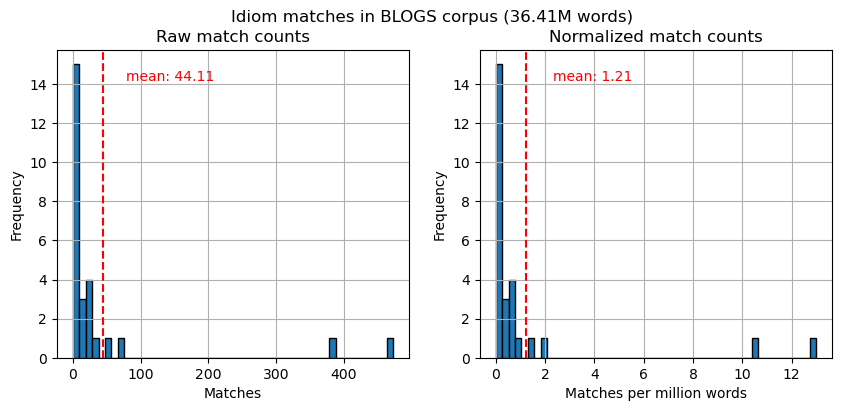

In [40]:
histCorpusMatches(*blogs_results, blogs_size, corpusName="BLOGS")

#### Twitter corpus

In [25]:
twitterFile = corporaFolder + 'hc_corpus/Eng_US_Twitter.txt'

In [26]:
def preprocessTwitterText(textString):
    textString = re.search(r'\t[^\t]*\n$', textString).group(0)
    textString = standardizeQuotes(textString)
    textString = removeQuotes(textString)
    textString = re.sub(r'\s+', ' ', textString) # Replace spaces, tabs, or newlines with a single space
    textString = re.sub(r'^\s*', '', textString) # Remove leading whitespace
    textString = re.sub(r'\s*$', '', textString) # Remove tailing whitespace
    textString = re.sub(r' ,', ',', textString) # (To make word count more accurate) remove spaces before puncuation
    textString = re.sub(r' \.', '.', textString)
    textString = textString.lower() # Lowercase text
    return textString

In [27]:
# # Code for testing the cleaning preprocessing
# texts = []
# i=0
# with open(twitterFile, 'r', encoding='utf-8') as f:
#     for text in f:
#         text = preprocessTwitterText(text)
#         texts.append(text)
#         i += 1
#         if i > 10:
#             break
# texts[6]

In [28]:
twitterTexts = []
with open(twitterFile, 'r', encoding='utf-8') as f:
    for line in f:
        text = preprocessTwitterText(line)
        twitterTexts.append(text)
twitter_size = calcCorpusSize(twitterTexts)
print(f"{color.BOLD}{twitter_size}{color.END} words in twitter corpus")

27934460 words in twitter corpus


In [16]:
# Sample of cleaned twitter text
twitterTexts[6]

'i no! i get another day off from skool due to the wonderful snow (: and this wakes me up...damn thing'

In [45]:
twitter_results = testCorpus(twitterTexts, idiom_list, "TWITTER")

Testing 27 idioms on TWITTER corpus
0: Testing \bchip on (\w+\s?){1,3}shoulders?\b...	13 matches (0.465 per million words)
1: Testing \blame ducks?\b...	10 matches (0.358 per million words)
2: Testing \baxe to grind\b...	3 matches (0.107 per million words)
3: Testing \bfollows? suit\b...	27 matches (0.967 per million words)
4: Testing \bplay \w+ card\b...	3 matches (0.107 per million words)
5: Testing \bover (\w+ ){1,3}heads?\b...	194 matches (6.945 per million words)
6: Testing \blow hanging fruits?\b...	12 matches (0.430 per million words)
7: Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b...	34 matches (1.217 per million words)
8: Testing \blead foot\b...	2 matches (0.072 per million words)
9: Testing \btrigger happy\b...	7 matches (0.251 per million words)
10: Testing \bin the cards\b...	20 matches (0.716 per million words)
11: Testing \bsilver linings?\b...	55 matches (1.969 per million words)
12: Testing \bon paper\b...	135 matches (4.833 per million words)
13: Testing \bskin of (\w+ )

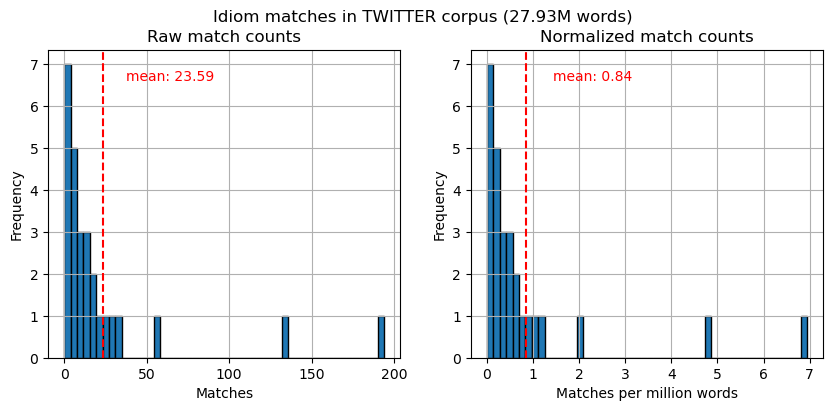

In [46]:
histCorpusMatches(*twitter_results, twitter_size, corpusName="TWITTER")

## **Open Subtitles Corpus**

### NO TOUCH: Initial unzip and calc of file size

Unzip 3.5GB .gz corpus to .txt file; can view in text editor

In [6]:
subtitlesCorpusZipped = corporaFolder + 'open_subtitles/enSubtitles.txt.gz'
subtitlesCorpus = corporaFolder + 'open_subtitles/enSubtitles.txt'

In [4]:
with gzip.open(subtitlesCorpusZipped, 'rb') as f_in:
    with open(subtitlesCorpus, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Count total lines and time it

In [9]:
start_time = time.time()
total_lines = 0
with open(subtitlesCorpus, 'r', encoding='utf-8') as f:
    for line in f:
        total_lines += 1
end_time = time.time() - start_time
print(f"{total_lines} total lines")
print(f"Time to calc total lines: {end_time:.2f} seconds")

441450449 total lines
Time to calc total lines: 375.78 seconds


### USE THIS: Small subsection of corpus

Again, pausing the investigation of this corpus. Data is very inconsistent, contains much filler ("character name:"), different formats between different movies (" - line here"), does not provide markers which differentiate separate movies

In [13]:
subtitlesCorpus = corporaFolder + 'open_subtitles/enSubtitles.txt'
subtitlesSample = corporaFolder + 'open_subtitles/enSubtitlesSample.txt'
subtitlesSmall = corporaFolder + 'open_subtitles/enSubtitlesSmall.txt'

In [18]:
def subsetSubtitles(subset_file_path, percentage_to_read, total_lines = 441450449):
    lines_to_read = int(total_lines * (percentage_to_read / 100))
    print(f"Reading {percentage_to_read}% ({lines_to_read} lines)")
    start_time = time.time()
    with open(subtitlesCorpus, 'r', encoding='utf-8') as infile:
        with open(subset_file_path, 'w', encoding='utf-8') as outfile:
            for i, line in enumerate(infile):
                if i >= lines_to_read:
                    break
                outfile.write(line)
    end_time = time.time() - start_time
    print(f"Took {end_time:.1f} seconds")

In [19]:
percentage_to_read = 0.05 # About 200,000 lines
subsetSubtitles(subtitlesSample, percentage_to_read)

Reading 0.05% (220725 lines)
Took 1.9 seconds


In [11]:
with open(subtitlesCorpus, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 30:
            break
        print(f"{i} | {repr(line)}")

0 | 'Presented by IM Pictures\n'
1 | 'Produced by Shin Cine\n'
2 | 'In association with MVP Venture Capital and Cinema Service\n'
3 | 'Jeon Ji-hyun Cha Tae-hyun\n'
4 | 'My Sassy Girl\n'
5 | 'Exactly two years ago today, she and I buried a time capsule here.\n'
6 | "We promised to meet here two years later, but she hasn't come yet.\n"
7 | "I'm going to wait.\n"
8 | 'Here we go.\n'
9 | "Please, don't move.\n"
10 | 'One, two...\n'
11 | 'Wait a minute.\n'
12 | 'Hello?\n'
13 | 'Oh, auntie.\n'
14 | "Sorry, I'm on my way.\n"
15 | "I'm really sorry.\n"
16 | "Yes, I'm coming.\n"
17 | "I'm having my photo taken.\n"
18 | 'Bye.\n'
19 | 'Are you ready?\n'
20 | 'Here we go.\n'
21 | 'One, two...\n'
22 | 'My parents wanted a daughter, so they raised me like one.\n'
23 | 'So I thought I was a girl until I was seven.\n'
24 | "I had to go to the women's public bath, too.\n"
25 | 'The older I got,\n'
26 | 'I thought my penis would get smaller and disappear.\n'
27 | 'But it was the opposite.\n'
28 | 'First

### Old regex search code

In [18]:
def search_subtitles(search_pattern, percentage=1.0):
    """
    Search through a specific percentage of a large text file using regex.

    Args:
    - search_pattern (str): The regex pattern to search for.
    - percentage (float): Percentage of the file to search through (0-100).

    Returns:
    - List of matches found in the specified portion of the file.
    """
    total_lines = 441450449
    # Calculate the number of lines to read based on the percentage
    lines_to_read = int(total_lines * (percentage / 100))
    print(f"Reading {percentage}% ({lines_to_read} lines)")

    start_time = time.time()
    matches = []
    # Now, read the specified number of lines and search with regex
    with open(subtitlesCorpus, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= lines_to_read:
                break
            if re.search(search_pattern, line):
                matches.append(line.strip())
    end_time = time.time() - start_time
    print(f"Search took {end_time:.2f} seconds")
    print(f"Found {len(matches)} matches")

    return matches

In [22]:
search_pattern = r'\bkick the bucket\b'
percentage_to_search = 10.0
matches = search_subtitles(search_pattern, percentage_to_search)

Reading 10.0% (44145044 lines)
Search took 66.11 seconds
Found 56 matches


In [23]:
search_pattern = r'\bkick(s|ed)? the bucket(s)?\b'
percentage_to_search = 10.0
matches = search_subtitles(search_pattern, percentage_to_search)

Reading 10.0% (44145044 lines)
Search took 70.89 seconds
Found 142 matches


## **Gutenberg corpus**

### [pg gutenberg github](https://github.com/pgcorpus/gutenberg/tree/master)

#### Gutenberg 1

In [7]:
gutenberg1Dir = corporaFolder + "gutenberg-1/data/.mirror"
gutenberg1CollectionFolder = corporaFolder + "gutenberg-1/collection_files/"

In [70]:
start_time = time.time()
for dirpath, dirnames, filenames in os.walk(gutenberg1Dir):
    for subFile in filenames:
        if subFile.endswith(".txt"):
            os.rename(os.path.join(dirpath, subFile), os.path.join(gutenberg1CollectionFolder, subFile))
end_time = time.time() - start_time
print(f"Move took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")

Move took 15.0 minutes (0.25 hours)


In [10]:
i=0
for filename in os.listdir(gutenberg1CollectionFolder):
    i += 1
print(i)

32496


In [20]:
ebook_num_list = []
start_time = time.time()
for filename in os.listdir(gutenberg1CollectionFolder):
    for match in re.findall(r'[^-]*-[^-]*-[^-]*',filename):
        #print(filename, end="\t\t")
        with open(os.path.join(gutenberg1CollectionFolder, filename), "r") as f:
            try:
                book_text = f.read().lower()
                ebook_num_match = re.search(r'\[e(?:book|text) #(\d+)\]', book_text).group(0)
                ebook_num_str = re.findall(r'\[e(?:book|text) #(\d+)\]', ebook_num_match)[0]
                if ebook_num_str in ebook_num_list:
                    print(f"Repeat: {ebook_num_str}")
                else:
                    ebook_num_list.append(ebook_num_str)
            except AttributeError as e:
                print(f"No EBook marker in file {filename}")
                #print(book_text)
            except UnicodeDecodeError as e:
                print(f"Unicode Decode error in file {filename}")
end_time = time.time() - start_time
print(f"That took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")

Repeat: 12096
Repeat: 35707
Repeat: 37482
Repeat: 38414
Repeat: 50185
Repeat: 43
Repeat: 209
Repeat: 2748
Repeat: 53811
Repeat: 2473
Repeat: 3137
Repeat: 3281
Repeat: 4905
Repeat: 60239
Repeat: 51155
Repeat: 370
Repeat: 64793
Repeat: 1666
Repeat: 34384
Repeat: 66279
Repeat: 66322
Repeat: 66349
Repeat: 66583
Repeat: 18800
Repeat: 37027
Repeat: 67758
Repeat: 33795
Repeat: 68027
Repeat: 2481
Repeat: 4705
Repeat: 4705
Repeat: 1184
Repeat: 69331
Repeat: 69332
Repeat: 69372
Repeat: 244
Repeat: 5195
That took 0.0 minutes (0.00 hours)


#### Gutenberg 3

In [9]:
gutenberg3Dir = corporaFolder + "gutenberg-3/data/.mirror"
gutenberg3CollectionFolder = corporaFolder + "gutenberg-3/collection_files/"
gutenberg3CollectionOldFolder = corporaFolder + "gutenberg-3/collection_old_files/"

In [14]:
start_time = time.time()
for dirpath, dirnames, filenames in os.walk(gutenberg3Dir):
    for subFile in filenames:
        if subFile.endswith(".txt"):
            move_folder = gutenberg3CollectionOldFolder if "old" in dirpath else gutenberg3CollectionFolder
            os.rename(os.path.join(dirpath, subFile), os.path.join(move_folder, subFile))
end_time = time.time() - start_time
print(f"Move took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")

Move took 11.2 minutes (0.19 hours)


In [15]:
files=0
old_files = 0
for filename in os.listdir(gutenberg3CollectionFolder):
    files += 1
for filename in os.listdir(gutenberg3CollectionOldFolder):
    old_files += 1
print(f"{files} files")
print(f"{old_files} old files")
print(f"{files + old_files} total files")

32398 files
638 old files
33036 total files


In [22]:
filename_num_list = []
start_time = time.time()
for filename in os.listdir(gutenberg3CollectionFolder):
    filename_num = int(re.findall(r'(\d+)-0.txt', filename)[0])
    filename_num_list.append(filename_num)
end_time = time.time() - start_time
print(f"That took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")
print(f"Max book is {max(filename_num_list)}")

That took 0.0 minutes (0.00 hours)
Max book is 74474


In [27]:
books_that_exist = np.zeros(max(filename_num_list)+1, dtype=int)
books_with_decode_error = np.zeros(max(filename_num_list)+1, dtype=int)
books_with_header_error = np.zeros(max(filename_num_list)+1, dtype=int)
ebook_num_list = []
start_time = time.time()
for filename in os.listdir(gutenberg3CollectionFolder):
    filename_num = int(re.findall(r'(\d+)-0.txt', filename)[0])
    books_that_exist[filename_num] = 1
    if ebook_num_str in ebook_num_list:
        print(f"Repeat of num {filename_num} in file {filename}")
    else:
        ebook_num_list.append(filename_num)
    with open(os.path.join(gutenberg3CollectionFolder, filename), "r") as f:
        try:
            book_text = f.read().lower()
        except UnicodeDecodeError as e:
            books_with_decode_error[filename_num] = 1
        else:
            try:
                ebook_num_match = re.search(r'\[e(?:book|text) #(\d+)\]', book_text).group(0)
                ebook_num_str = re.findall(r'\[e(?:book|text) #(\d+)\]', ebook_num_match)[0]
            except AttributeError as e:
                books_with_header_error[filename_num] = 1
            else:
                if int(ebook_num_str) != filename_num:
                    print(f"ebook num {ebook_num_str} does not match filename num {filename_num} in file {filename}")
end_time = time.time() - start_time
print(f"That took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")

ebook num 12884 does not match filename num 12284 in file 12284-0.txt
ebook num 3198 does not match filename num 3189 in file 3189-0.txt
ebook num 4971 does not match filename num 4791 in file 4791-0.txt
ebook num 56235 does not match filename num 56234 in file 56234-0.txt
That took 7.8 minutes (0.13 hours)


* Corrected number in 3189-0.txt from 3198; file 3198 DOES exist
* Corrected number in 4791-0.txt from 4971; file 4971 DOES NOT exist
* Corrected number in 12284-0.txt from 12884; file 12884 DOES NOT exist
* Corrected number in 56234-0.txt from 56235; file 56235 DOES exist (duplicate book??)

In [28]:
total_books = sum(books_that_exist)
undecodable_books = sum(books_with_decode_error)
naked_books = sum(books_with_header_error)
print(f"{total_books} total books")
print(f"{undecodable_books} books with decode error ({undecodable_books/total_books:.5f} of the total)")
print(f"{naked_books} books with no header ({naked_books/(total_books-undecodable_books):.5f} of the decodable books)")
print(f"Leaving {total_books-undecodable_books-naked_books} complete books ({(total_books-undecodable_books-naked_books)/total_books} of the total)")

32398 total books
65 books with decode error (0.00201 of the total)
3535 books with no header (0.10933 of the decodable books)
Leaving 28798 complete books (0.8888820297549231 of the total)


Lets just work with ONLY the books that are complete (readable and have proper headers). Later, I can come back to those which have non-proper headers

In [47]:
books_with_proper_header = books_that_exist & ~books_with_decode_error & ~books_with_header_error
books_with_language_and_start_end_references = np.zeros(max(filename_num_list)+1, dtype=int)
book_languages = np.empty(max(filename_num_list)+1, dtype=str)

print(f"There are {sum(books_with_proper_header)} books with proper headers")
languages = []
start_time = time.time()
for filename in os.listdir(gutenberg3CollectionFolder):
    filename_num = int(re.findall(r'(\d+)-0.txt', filename)[0])
    if books_with_proper_header[filename_num]:
        with open(os.path.join(gutenberg3CollectionFolder, filename), "r") as f:
            book_text = f.read().lower()
            try:
                language_match = re.search(r'language: ([\S ]*)\n', book_text).group(0)
                language_text = re.findall(r'language: ([\S ]*)\n', language_match)[0]
                languages.append(language_text)
            except AttributeError as e:
                print(f"filename num {filename_num} does not have language")
            try:
                start_reference_match = re.search(r'start of (the|this) project gutenberg ebook', book_text).group(0)
                end_reference_match = re.search(r'end of (the|this) project gutenberg ebook', book_text).group(0)
            except AttributeError as e:
                print(f"filename num {filename_num} does not have either a start or end reference")
            except:
                print(f"filename num {filename_num} has another error reading start/end references")
end_time = time.time() - start_time
print(f"That took {end_time/60:.1f} minutes ({end_time/3600:.2f} hours)")

There are 28798 books with proper headers
filename num 1986 does not have either a start or end reference
filename num 2319 does not have language
filename num 2319 does not have either a start or end reference
filename num 2678 does not have language
filename num 2678 does not have either a start or end reference
filename num 2766 does not have language
filename num 2766 does not have either a start or end reference
filename num 2809 does not have language
filename num 2897 does not have language
filename num 2899 does not have language
filename num 2947 does not have language
filename num 2947 does not have either a start or end reference
filename num 29814 does not have either a start or end reference
filename num 3027 does not have either a start or end reference
filename num 33089 does not have either a start or end reference
filename num 33764 does not have either a start or end reference
filename num 34705 does not have either a start or end reference
filename num 3512 does not 

In [53]:
np.unique(languages, return_counts=True)

(array(['', 'afrikaans', 'arabic', 'arapaho', 'bulgarian', 'calo',
        'catalan', 'chinese', 'chinese and english', 'chinese, english',
        'czech', 'czech, esperanto', 'danish', 'dutch', 'e. p. s. allen',
        'en', 'englilsh', 'english', 'english and french',
        'english and maori', 'english and old english',
        'english with french', 'english, middle (1100-1500)',
        'english/latin', 'esperanto', 'farsi', 'finnish', 'fr', 'french',
        'french (with english)', 'french / onondaga / english',
        'french and latin', 'frisian', 'friulian', 'galician', 'gascon',
        'german', 'greek', 'hebrew', 'hungarian', 'icelandic',
        'interlingua', 'inuktitut', 'irish',
        'it includes irish, scotch, and', 'italian', 'japanese',
        'kamilaroi and english', 'kashubian and  polish', 'latin',
        'latin with english and greek (ancient)', 'low german',
        'middle english', 'nahuatl', 'neapolitan', 'norwegian',
        'pennsylvania dutch', 

There are 22645 english texts. TODO: put these in array corresponding to file

# *Testing idiom-by-idiom*

## Init

In [29]:
corpora_list = [
    (switchboardTexts, switchboard_size, "SWITCHBOARD"),
    (slateTexts, slate_size, "SLATE"),
    (biomedTexts, biomed_size, "BIOMED"),
    (newsTexts, news_size, "NEWS"),
    (blogsTexts, blogs_size, "BLOGS"),
    (twitterTexts, twitter_size, "TWITTER")
]

In [30]:
def testIdiom(corpora_list, idiomPattern):
    print(f"Testing {color.YELLOW}{idiomPattern}{color.END} on these corpora: {color.BLUE}{[name for _,_,name in corpora_list]}{color.END}")
    for corpusTexts, corpus_size, corpus_name in corpora_list:
        start_time = time.time()
        matchesList, indexList = testIdiomOnCorpus(corpusTexts, idiomPattern)
        end_time = time.time() - start_time
        print(f"{color.BLUE}{corpus_name:<12}{color.END} | {color.BLUE}{corpus_size/1000000:>6.2f}M{color.END} words | {color.DARKCYAN}{end_time:>3.2f} seconds{color.END} | {color.RED}{len(matchesList):>4}{color.END} matches | {color.RED}{len(matchesList)/corpus_size*1000000:>6.2f}{color.END} per million words")

In [31]:
def printIdioms(corpusTexts, idiomPattern, context_len=30):
    for i,text in enumerate(corpusTexts):
        match = re.search(idiomPattern, text)
        if match is not None:
            match_context = text[max(0,match.start()-context_len):min(len(text),match.end()+context_len)]
            print(f"Found match at {i} | {color.GREEN}{match_context}{color.END}")

In [32]:
def testIdiomDifference(corpusTexts, idiomPattern1, idiomPattern2, context_len=30):
    for i,text in enumerate(corpusTexts):
        match1 = re.search(idiomPattern1, text)
        match2 = re.search(idiomPattern2, text)
        if (bool(match1 is None) ^ bool(match2 is None)):
            print(f"Discrepancy at index {i}")
            match1context = text[max(0,match1.start()-context_len):min(len(text),match1.end()+context_len)] if match1 else "None"
            match2context = text[max(0,match2.start()-context_len):min(len(text),match2.end()+context_len)] if match2 else "None"
            print(f"\t{idiomPattern1} gives {color.GREEN}{match1context}{color.END}")
            print(f"\t{idiomPattern2} gives {color.GREEN}{match2context}{color.END}")

## Idiom sorting

### Sorted

In [388]:
idiom_list_confident = [
    r'\blame ducks?\b', # Uncommon. Very reliable. Ocurrs particular in news contexts (slate and news corpora)
    r'\baxes? to grind\b', # Somewhat uncommon. Very reliable
    r'\blow hanging fruits?\b', # Very uncommon. Reliable (but news had example of actually cutting low hanging fruit and cutting branches)
    r'\bmuckrak(?:er|ers|ing|ed|e|es)\b', # prominent in news stuff
    r'\blead (?:foot|feet)\b', # Uncommon but reliable, always in driving context
    r'\btrigger happy\b', # Rare (only in informal settings like blogs and twitter). But very reliable
    r'\bsilver linings?\b', # Relatively common and very reliable
    r'\bdrop of a hat\b', # Uncommon. Reliable. Only missing a few ("drop of fates hat" and "drop of the hat")
    r'\bcats? out of the bags?\b', # Uncommon. Reliable
    r'\bmade of money\b', # Very uncommon
    r'\bcr(?:y|ies|ied|ying) over (?:spilled|spilt) milk\b', # Uncommon
    r'\bbad blood\b', # Uncommon
    r'\bin a nutshell\b', # COMMON (unexpected). Very reliable
    r'\bbottom line\b', #VERY COMMON. Very reliable
    r'\bturn(?:s|ing|ed)? (\w+ ){,2}blind eyes?\b', # Somewhat common. Very reliable (even with posessives!)
    r'\b(?:through|on) (\w+ ){,3}grapevines?\b', # Pretty uncommon. Pretty reliable (though there was an example of someone actually driving through acres of grapevines)
    r'\bunder the weather\b', # Somewhat common. Very reliable
    r'\bbeat(?:s|ing)? around the bush\b', # Uncommon. Reliable
    r'\bgarden variety\b', # Pretty uncommon. Pretty reliable (though one in news actually did talk about garden variety lettuce)
    r'\bmov(?:e|ed|ing|es) the goal posts?\b', # Rare (surprising),
    r'\bhousehold names?\b', # Somewhat common. Probably missing a lot (can have household anything)
    r'\bnip (?:\w+ ){,3}in the bud\b', # Very uncommon. Very reliable (even with various nouns)
    r'\b(?:break|breaking|breaks|broke) bread\b', # Pretty uncommon. Somewhat reliable (but there are a few references to actual religious practices of breaking bread)
    r'\btips? of (?:\w+ )icebergs?\b', # Somewhat common. Reliable,
    r'\b(?:apples|oranges) to (?:apples|oranges)\b', # Uncommon. Very reliable
    r'\bjacks? of all trades\b', # Uncommon. Very reliable
    r'\b(?:drew|draw(?:s|ing|n)?|pull(?:s|ing|ed)?|got|given|get(?:s|ing)?) the short straw\b', # Very uncommon. Reliable
    r'\bskin of (\w+ ){1,3}teeth\b', # Very uncommon. Very reliable
    r'\b(?:went|gone|go(?:es|ing)?) out of (?:his|her|my|your|their|its|our|ones|the) way\b', # VERY COMMON. Reliable. Is "out of the way" an idiom?
    r'\b(?:bit(?:e|es|ing|ten)?) (off )?more than (?:i|we|he|she|they|you|yall|it|one) (?:can|could) chew\b', # Uncommon. Reliable. Not sure what else to put for noun?
    r'\bbur(?:y|ies|ied|ying) the hatchets?\b', # Rare. Pretty reliable (maybe instance of actually burying a hatchet but hard to tell)
    r'\bdog and pony show\b', # Rare. Reliable (but only have small set of data to tell; may not be in actuality)
    r'\bcut(?:s|ting)? (?:(?:his|her|my|your|their|its|our|ones) (?:\w+ ){,2})?teeth\b', # Somewhat uncommon. Reliable (one instance in blogs of some actually cutting their teeth)
    r'\b(?:learn(?:s|ing|t)?|show(?:s|ing|ed)?) the ropes\b', # Uncommon. Very reliable
    r'\bpipe dreams?\b', # Uncommon. CTU (Close To Unique)
    r'\blives? under a rock\b', # Very uncommon. Very reliable (with this wording). Present in informal contexts
    r'\bdiamonds? in the rough\b', # Very uncommon. CTU
    r'\bnothing to (?:sneeze|scoff) at\b', # Very uncommon. CTU. Maybe missing some other variations?
    r'\bfrom a to z\b', # Very uncommon. CTU/LI
    r'\bfrom (?:point )?a to (?:point )?b\b', # Somewhat uncommon. CTU/LI
    r'\b(?:hard|tough) as (?:a )?nails?\b', # Uncommon. LI (Less Idiomatic)
    r'\b(?:hard|tough) nut to crack\b', # Rare. Probably reliable
    r'\bthe big picture\b', # COMMON. Very reliable (possibly some actual references to a 'big picture' (when little picture appeared before it, but unsure)
    r'\b(?:come|comes|coming|came) into play\b', #COMMON. LI?
    r'\bwhat the (?:hell|heck)\b', # INCREDIBLY COMMON. CTU/LI. Exists less in more formal contexts?
    r'\bwhat the fuck\b', # STILL VERY COMMON. But NO occurrences in news; only blogs or twitter (bc more vulgar)
    r'\bdown the line\b', # COMMON. CTU? (Would only be non-unique if original meaning (railway line) used)
    r'\bon the line\b', # VERY COMMON. But only somewhat reliable; confusuion with different literal usage (on the phone)
    r'\bout of line\b', # Somewhat common. Very reliable (theoretically, some confusion with the same literal meaning of someone being out of a line)
    r'\bdown to the line\b', # Very rare. Reliable. Replacing 'line' with 'wire' makes only uncommon
    r'\bon (?:the right)?track\b', # VERY COMMON. CTU? Especially prevalent in news
    r'\bknee(?: |-)?jerk\b', # Somewhat common. CTU
    r'\b(?:right|straight) off the bat\b', # Somewhat uncommon. Reliable (just using "off the bat" gets a few more idiomatic matches, but many more literal matches from baseball)
    r'\bon target\b', # Somewhat common. Somewhat reliable, but there are a few *actual* uses of 'on target' in archery or shooting contexts
    r'\bthumbs up\b', # COMMON. Pretty reliable (some descriptions of people *literally* putting thumbs up to indicate yet, but rare, and in some sense these occurrences count)
    r'\b(?:fell|fall(?:s|ing|en)?) in love\b', # INCREDIBLY COMMON. CTU/LI
    r'\brules? of thumb\b', # Somewhat common. CTU
    r'\bface value\b', # Somewhat common. Only somewhat reliable (there are a number of occurrences of coin related 'face value' statements)
    r'\bfully?(?:-| )fledged\b', # COMMON. CTU/LI. Occurs in many forms in blogs/twitter, but only grammatically correct form in news corpus
    r'\bgoes to show\b', # COMMON. CTU. Similar to above, twitter & blogs has many differences from "it (just) goes to show", while news has few
    r'\b(?:got|get|getting|gotten|gets) a handle on\b', # Somewhat common. CTU
    r'\bon the same page\b', # VERY COMMON. LI, pretty reliable (still a chance for there to be a liter occurrence, though)
    r'\b(?:took|tak(?:e|es|ing|en)) a stab at\b', # Uncommon. Reliable (more than I would have imagined; haven't found any literal usages yet of people being stabbed)
    r'\b(?:took|tak(?:e|es|ing|en)) (?:his|her|my|your|their|its|our|ones) word for it\b', # Somewhat common. CTU
    r'\bwild(?: |-)goose(?: |-)chase\b', # Rare. CTU
    r'\b(?:hold|held|holds|holding) (?:\w+ ){,1}tongues?\b', # Somewhat uncommon. CTU/LI. Twitter especially difficult to catch all subject examples without using \w+ (yo, the, that)
    r'\bkick(?:s|ing|ed)? the bucket\b', # Pretty uncommon. CTU
    r'\b(?:eat|eats|eating|eaten|ate) (?:his|her|my|your|their|its|our|ones) hats?\b', # Very very rare (a little surprised). CTU
    r'\broll(?:s|ed|ing)? up (?:his|her|my|your|their|its|our|ones) sleeves\b', # Uncommon. Pretty reliable, so far (though if we were to examine books there might be actual examples of rolling up sleeves for manual labor)
    r'\b(?:took|tak(?:e|es|ing|en)) the plunge\b', # Somewhat common (very common in blogs). Very reliable (though there could be examples of actually taking a know plunge into water (itd be rare though))
    r'\bblood boil(?:s|ed|ing)?\b', # Uncommon. Very reliable
    r'\b(?:bated|baited) breath\b', # Somewhat uncommon. CTU. Fun fact, bated is short for abated (which I think makes it an idiom since 'bated' does not mean diminished/lessened in the first place). Baited often used but is a misspelling
    r'\brub(?:s|bed|bing)? (?:\w+ ){1,3}the wrong way\b', # Pretty uncommon. Pretty reliable
    r'\bbutterflies in (?:his|her|my|your|their|its|our|ones|the) stomachs?\b', # Pretty uncommon. CTU
    r'\bsweat(?:s|ing)? bullets\b', # Rare. CTU
    r'\bbells and whistles\b', # Somewhat common. Very reliable
    r'\bcut of (?:\w+ )jib\b', # Almost nonexistent (only 2 in twitter). CTU?
    r'\b(?:hung|hang(?:s|ing)?) (?:on )?by a thread\b', # Pretty uncommon. Pretty reliable (LI?)
    r'\b(?:2|two) peas in a pod\b', # Somewhat rare. Reliable (LI?)
    r'\bbone to pick\b', # Pretty uncommon. CTU
    r'\bdevils advocate\b', # Pretty uncommon. CTU/LI
    r'\bgo figure(?! out)\b', # PRETTY COMMON. Very reliable ('go figure out' does not occur too much, but is excluded). Interesting: very prevalent in blogs & twitter, not news (maybe bc its conversational?)
    r'\b(?:paid|pay(?:s|ed|ing)?) (?:\w+ ){,3}respects?\b', # COMMON. CTU/LI
    r'\b(?:fought|fight(?:s|ing)?|battl(?:e|es|ed|ing)) (?:\w+ ){,2}tooth and nail\b', # Uncommon. CTU/LI
    r'\bdrop(?:s|ped|ping)? (?:\w+ ){,1}names?\b', # Somewhat uncommon. Pretty reliable (one example of dropping names in a hat, one example of a name dropping off a list)
    r'\beggs in (?:\w+ ){1,2}basket\b', # Uncommon. Pretty reliable (one example of dyed easter eggs in a basket)
    r'\bwalk(?:s|ed|ing)? on eggshells\b', # Very uncommon. Very reliable
    r'\b(?:rites?|rights?) of passage\b', # Somewhat common. CTU. Need to include the misspelling 'right' to get the last 20% of occurrences
    r'\bbit(?:e|es|ing|ten)? the bullet\b', # Somewhat common. CTU. Much more common in blogs than news
    r'\bback(?: |-)seat driv(?:er|ers|ing)\b', # Rare. Very reliable (LI) because the literal meaning would be (basically) nonsensical
    r'\bbust(?:s|ed|ing)? (?:\w+ ){,2}chops\b', # Pretty uncommon. CTU (but I technically found one example of a "bust to the chops" meaning a blow to the butt; unexpected)
    r'\bunder fire\b', # COMMON. Very reliable (CTU?). Much more common in news corpus than blogs or twitter
    r'\bminc(?:e|ed|ing) words\b', # Pretty uncommon. CTU
    r'\bsplit(?:s|ting)? hairs?\b', # Very uncommon. CTU
    r'\bloose cannons?\b', # Somewhat common. CTU/LI
    r'\bbit(?:e|es|ing|ten)? the dust\b', # Uncommon. CTU
    r'\bsplit(?:s|ting)? the difference\b', # Very uncommon. CTU/LI
    r'\btrojan horses?\b', # Uncommon. CTU
    r'\bsmoke and mirrors\b', # Uncommon. Very reliable (LI, but could technically appear literally)
    r'\b(?:lost|los(?:e|es|ing)|sav(?:e|es|ed|ing)) face\b', # Somewhat uncommon. CTU
    r'\bno mean feat\b', # Uncommon. CTU
    r'\bdime a dozen\b', # Pretty common. Very reliable (LI)
    r'\bjump the gun\b', # Rare. CTU
    r'\b(?:got|gotten|get(?:s|ting)?) wind of\b', # Somewhat uncommon. Very reliable (CTU?)
    r'\bcloud nine\b', # Uncommon. CTU
    r'\bsalt of the earth\b', # Pretty uncommon. CTU. From the bible
    r'\bdown to earth\b', # COMMON. Mostly reliable (a couple examples of 'gods coming down to earth' and such)
    r'\blook(?:s|ed|ing)? on the bright side\b', # Somewhat uncommon. Pretty reliable (havent found literal usages yet, but could happen)
    r'\b(?:best|worst) of (?:all|both) possible worlds\b', # Rare. CTU/LI
    r'\b(?:ran|run(?:s|ning)?) (?:\w+ )mouths?\b', # Uncommon. CTU. (Except its very common in twitter, mainly bc its more slang than idiom; but evolved from idiom "run off at the mouth")
    r'\bsilver tongues?\b', # Rare. CTU
    r'\bcouch potato(?:es)?\b', # Somewhat common. CTU
    r'\bcut(?:s|ting)? corners\b', # Somewhat common. CTU
    r'\bcut(?:s|ting)? (?:the|in) line\b', # Uncommon. CTU
    r'\b(?:lost|lose(?:s|ing)?) (?:his|her|my|your|their|its|our|ones) marbles\b', # Very uncommon. Very reliable (though there technically could be literal examples)
    r'\bout of (?:his|her|my|your|their|its|our|ones) minds?\b', # VERY COMMON. CTU (technically there could be literal occurrence of something, say, 'growing out of ones mind')
    
]

In [32]:
posessive_string = r'(?:his|her|my|your|their|its|our|ones)'

In [387]:
idiom_list_unsure = [
    r'\bfollow(?:s|ing|ed)? suit\b', # There *are* some literal usages; hard to tell apart
    r'\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b', # Somewhat common. Mostly idiomatic, but *easy* to confuse literal vs idiomatic usages
    r'\bon paper\b', # Very common, but not always idiomatic. ~10-20% are literal (dry on paper towels, write on paper)
    r'\bchopped liver\b', # Uncommon. Can definitely be confused literal vs idiomatic. Interestingly, everything in news corpus (7) is strictly literal (maybe bc giving recipes) while blogs and twitter (3 and 19) are majority idiomatic (maybe because informal/personal)
    r'\ball bark no bite\b', # Very rare
    r'\brabbit holes?\b', # Somewhat common. Some confusion with actual rabbit holes and Alice in Wonderland
    r'\bwhen in rome\b', # Uncommon. A fair number of actual statements about rome
    r'\bspeak of the devil\b', # Rare. Some refer to movie/ep called this
    r'\bfish or cut bait\b', # Very rare (almost none)
    r'\bcards (?:are )?on the table\b', # Uncommon. Somewhat hard to tell literal vs idiomatic
    r'\bmeasures? twice,? cuts? once\b', # Very rare (2 occurrences total, in twitter)
    r'\bstick in the mud\b', # Very rare (4 total). Should be mostly reliable
    r'\bsoapbox\b', # Somewhat common. Only somewhat reliable; interesting word, being mostly idiomatic, but a few examples of actual soapboxes and a few examples of the soapbox derby
    r'\byoung blood\b', # Pretty rare (almost nonexistent besides twitter). Not too reliable (occurrences of the 5sos song 'young blood')
    r'\bunder the influence\b', # COMMON. But only somewhat reliable (many occurrences of someone being 'under the influence' of something else like music). HOWEVER, news has abnormally high number of occurrences, and they are all idiomatic (and all about driving UTI)
    r'\b(?:blew|blow(?:s|ing)?) (?:his|her|my|your|their|its|our|ones) tops?\b', # Rare. Pretty reliable (but not enough data to be sure), though there was an example of a volcano blowing its top in news corpus
    r'\bfools gold\b', # Uncommon. Not that reliable (pyrite is referred to as fools gold; theres also a movie with this title)
    r'\bdollars to doughnuts\b', # Almost never occurs
    r'\bboot (?:is )?on the other foot\b', # Almost never occurs
    r'\b(?:stuck|stick(?:s|ing)?) (?:\w+ )necks? out\b', # Pretty uncommon. Mostly reliable but could be literal (and there are a bunch of tweets of a quote including the phrase)
    r'\blikely story\b', # Almost nonexistent. Cool idiom, but unfortunately almost never appears except for a few times in twitter (conversational)
    r'\bon the fence\b', # COMMON. But only sometimes reliable (many examples of tape/posters/cameras on a physical fence)
    r'\bmad (?:as a )?hatter\b', # Uncommon. Not reliable (many occurrences of mad hatter ipa and mad hatter from Alice in Wonderland)
    r'\b(?:went|go(?:es|ne|ing)?) postal\b', # Uncommon. Mostly reliable (but found examples of Terry Pratchet book and app with the 'go/going postal' title)
    r'\bscrews? loose\b', # Rare. Mostly reliable (but some occurrences of literal screws being loose)
]

In [34]:
idiom_list_working = [
    r'\bchips? on ' + posessive_string + r' shoulders?\b',
    r'\bplay(?:s|ing|ed)? ' + posessive_string + r' cards?\b', # more that are being missed from posessive modifiers
    r'\b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over ' + posessive_string + r' heads?\b', # 'the' may be good for posessives
    r'\bbehind (?:\w+ )backs?\b', # COMMON. But tough to tell apart literal from idiomatic occurrences
    r'\bin the cards\b',
    r'\bcards on the tables?\b',
    r'\bburn (\w+ ){1,3}bridges?\b',
    r'\b(6|six) \w+ one,? (\w+ ){0,3}half(-| )dozen\b',
    r'\brains? on (\w+ ){1,3}parades?\b',
    r'\bpigs? fl(y|i)\w*\b',
    r'\btie one on\b', # Very rare (almost nonexistent). And some occurrences refer to the honeybee stamp (?); or there is a literal usage (tie one on to ...)
]

### TODO

#### **Less idiomatic**

* agree to disagree
* set it in motion
* weight off ones mind/shoulders
* better safe than sorry
* rob one blind
* lower ones guard
* look before you leap
* play it safe
* safe side
* let sleeping dogs lie
* think twice
* safe bet
* no two ways about it
* breath of fresh air
* cant teach an old dog new tricks
* break the mould
* rise from the ashes
* the dust settles
* every which way
* come apart at the seams
* if you cant beat them, join them
* meet halfway
* takes two to tango
* nerves of steel
* take the law into your own hands
* slap on the wrist - still use
* crossroads
* make or break - use
* moment of truth - use
* point of no return - use
* cast the first stone - use
* wolf in sheeps clothing
* not long for this world
* dont bet on it
* even stevens/stephens
* meet ones match - use
* time is money
* (you) live and (you) learn
* been there, done that
* like father, like son
* flesh and blood\
* have eyes bigger than ones stomach
* time will tell
* needle in a haystack - use
* reinvent the wheel
* forbidden fruit - use
* hope springs eternal - use
* when it rains it pours / it never rains but it pours

---

#### **Difficult, for whatever reason**

* keep _ under ones hat
* bleed one dry
* log arm of the law
* wear the pants
* boys in blue
* public enemy (number 1)
* up the river
* pot calling the kettle black
* rap one over the knuckles
* get square with
* drown ones sorrows
* cold turkey
* come out of the closet
* know _ like the back of ones hand
* not playing with a full deck

#### **Literal confusion**

* sparks fly
* get under ones skin
* add fuel to the fire
* see red
* hands are tied
* thin ice
* walk in the park
* drag _ through the dirt/mud
* take one to the cleaners
* dip ones toes
* play ball
* shoulder to shoulder
* lions den
* out of the woods
* off/on the hooks
* do a number on
* take one for a ride
* on ones plate
* wash your hands of
* in spades
* over the top - still use
* get ones feet wet
* spread ones wings
* water under the bridge
* lay ones cards on the table
* count ones chickens / count ones eggs before theyve hatched
* in hot water
* beat to death (very difficult to separate)
* flip a coin
* ring a bell
* out of pocket
* on ones last leg (confused with leg of journey)

#### **Maybeys**

* drag your feet
* step up to the plate
* flip ones lid
* last/final straw
* blow/toot ones own horn/trumpet
* sight for sore eyes
* ugly duckling
* nose to the grindstone
* start/get the ball rolling
* pride goes before the/a fall
* hand in the cookie jar
* throw caution to the wind
* count ones chickens (before they've hatched)
* turn (over) a new leaf
* turn/tip the scales
* upset the apple cart
* hell broke loose
* silver spoon
* like a glove
* in cahoots
* give and take
* same page
* cold feet
* by the book
* eleventh hour
* knife-edge
* push comes to shove
* saved by the bell
* siren song
* davy jones locker
* give up the ghost
* one foot in the grave
* grim reaper
* six feet deep/under
* beyond the veil
* false colors
* hook, line, and sinker
* wooden nickel
* sleight of hand
* pull the wool over ones eyes
* all bets are off
* pinch/grain of salt
* lick ones wounds
* tail between ones legs
* at odds
* throw one for a loop
* in the ballpark
* burn the candle at both ends
* break the bank
* a chip off the old block
* dead from the neck up
* writings (writing is) on the wall
* turn the other cheek
* hold out/extend an olive branch
* wipe the slate clean / clean slate
* thick skin
* waste ones breath
* flog/beat a dead horse
* spit in(to) the wind
* music to ones ears
* paint the town red
* tickled pink
* on top of the world
* hold your horses
* green around/about the gills
* a straight arrow
* cross my heart
* not rocket science
* eat your heart out
* reap what you sow
* sweet nothings
* come hell or high water
* nail in the coffin

#### **Strict structure/non-confusing**

**Not considered**
* couch potato
* cut corners
* mad as a hatter / mad hatter
* lose ones marbles
* out of ones mind
* go postal
* have a screw loose
* hedge ones bets
* jury is out
* roll with the punches
* slippery slope
* word of mouth

**Implemented**
* wild goose chase
* soapbox
* young blood
* tie one on
* under the influence
* kick the bucket
* eat my hat
* roll up ones sleeves
* take the plunge
* blood boil
* blow ones top
* bated breath
* rub _ the wrong way
* butterflies in _ stomach
* sweat bullets
* bells and whistles
* cut of _ jib
* fools gold
* hang (on) by a thread
* peas in a pod
* bone to pick
* devils advocate
* go figure
* pay your/his/ones respects
* tooth and nail
* drop names/name drop
* eggs in one basket
* walk on eggshells
* dollars to doughnuts
* boot is on the other foot
* rite of passage
* bite the bullet
* stick ones neck out
* back-seat driver
* bust ones chops
* under fire
* mince words
* loose cannon
* bite the dust
* trojan horse
* smoke and mirrors
* likely story
* lose/save face
* no mean feat
* dime a dozen
* jump the gun
* get wind of
* cloud nine
* salt of the earth
* look on the bright side
* best/worst of both/all possible worlds
* on the fence
* run off at the mouth / run ones mouth
* silver tongue

#### **Recommended to search for**

**Not considered**

**Implemented**
* big picture
* come into play
* what the hell/heck
* down the line
* on (the right) track
* knee-jerk
* right/straight off the bat
* on target
* thumbs up
* fall in love
* rule(s) of thumb
* take _ at face value
* full-fledged
* get a handle on
* goes to show
* nitty-gritty
* on the same page
* take/make a stab at
* take ones word for it

***LEFT OFF ON PAGE 335 (MISTAKES) OF ["OXFORD DICTIONARY OF IDIOMS (2ND ED)"](https://www.ascdegreecollege.ac.in/wp-content/uploads/2020/12/Oxford_Dictionary_of_Idioms.pdf)***

## Testing

In [384]:
idiomPattern1 = r'\bscrews? loose\b'
testIdiom(corpora_list, idiomPattern1)

Testing \bscrews? loose\b on these corpora: ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words | 0.34 seconds |    0 matches |   0.00 per million words
SLATE        |   4.18M words | 0.52 seconds |    4 matches |   0.96 per million words
BIOMED       |   3.32M words | 0.53 seconds |    0 matches |   0.00 per million words
NEWS         |  33.34M words | 5.08 seconds |    3 matches |   0.09 per million words
BLOGS        |  36.41M words | 4.33 seconds |    5 matches |   0.14 per million words
TWITTER      |  27.93M words | 3.92 seconds |    4 matches |   0.14 per million words


In [378]:
idiomPattern2 = r'\bscrews? loose\b'
testIdiom(corpora_list, idiomPattern2)

Testing \bout of (?:his|her|my|your|their|its|our|ones) mind\b on these corpora: ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words | 0.24 seconds |    1 matches |   0.34 per million words
SLATE        |   4.18M words | 0.33 seconds |    7 matches |   1.67 per million words
BIOMED       |   3.32M words | 0.30 seconds |    0 matches |   0.00 per million words
NEWS         |  33.34M words | 3.54 seconds |   31 matches |   0.93 per million words
BLOGS        |  36.41M words | 3.65 seconds |  111 matches |   3.05 per million words
TWITTER      |  27.93M words | 3.09 seconds |  165 matches |   5.91 per million words


In [377]:
testIdiomDifference(blogsTexts, idiomPattern1, idiomPattern2)

Discrepancy at index 41874
	\bout of (?:his|her|my|your|their|its|our|ones) minds?\b gives None
	\bout of (?:\w+ ){1}minds?\b gives oughts and worries are driven out of the mind and it feels refreshed.
Discrepancy at index 575871
	\bout of (?:his|her|my|your|their|its|our|ones) minds?\b gives None
	\bout of (?:\w+ ){1}minds?\b gives self through which i can walk out of the mind reality into the actual reali
Discrepancy at index 636696
	\bout of (?:his|her|my|your|their|its|our|ones) minds?\b gives None
	\bout of (?:\w+ ){1}minds?\b gives ove the surprises that emerge out of the mind.
Discrepancy at index 674299
	\bout of (?:his|her|my|your|their|its|our|ones) minds?\b gives None
	\bout of (?:\w+ ){1}minds?\b gives  to write this down to get it out of the mind and system before i can sleep
Discrepancy at index 873666
	\bout of (?:his|her|my|your|their|its|our|ones) minds?\b gives None
	\bout of (?:\w+ ){1}minds?\b gives  myself that i can find a way out of this mind possession and apply

In [386]:
printIdioms(blogsTexts, idiomPattern1, context_len = 70)

Found match at 113233 | 2. get a rusty screw loose. i have not tried this one but when i heard it, it makes sense that i
Found match at 149565 | , i realize that people driving by probably thought i had a couple of screws loose, but i lived near the rails to trails, so i just started walking. and
Found match at 149889 |  the illegal chicken coop is one of those doomsday types with several screws loose and the likely anonymous snitch is my old friend i am staying the hel
Found match at 153783 | ts i offer up on this blog you would probably all be thinking i had a screw loose, but since i give my tidbits up for free i am pretty certain you are 
Found match at 651505 | h me luck because wah? were going to ikea on a sunday? we must have a screw loose.


## Special notes

### Posessives in "chip on my/her/their shoulder"

In [171]:
posessive_string = r'(?:his|her|my|your|their|its|our)'

In [174]:
idiomPattern1 = r'\bchips? on (?:\w+ ){1,3}shoulders?\b'
testIdiom(corpora_list, idiomPattern1)

Testing \bchips? on (?:\w+ ){1,3}shoulders?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    0 matches |   0.00 per million words
SLATE        |   4.18M words |    1 matches |   0.24 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   52 matches |   1.56 per million words
BLOGS        |  36.41M words |   16 matches |   0.44 per million words
TWITTER      |  27.93M words |   14 matches |   0.50 per million words


In [175]:
idiomPattern2 = r'\bchips? on ' + posessive_string + r' shoulders?\b'
testIdiom(corpora_list, idiomPattern2)

Testing \bchips? on (?:his|her|my|your|their|its|our) shoulders?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    0 matches |   0.00 per million words
SLATE        |   4.18M words |    1 matches |   0.24 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   47 matches |   1.41 per million words
BLOGS        |  36.41M words |   15 matches |   0.41 per million words
TWITTER      |  27.93M words |   13 matches |   0.47 per million words


In [178]:
testIdiomDifference(blogsTexts, idiomPattern1, idiomPattern2)

Discrepancy at index 616828
	\bchips? on (?:\w+ ){1,3}shoulders?\b gives ver that super tuesday sting. chip on the old shoulder just waiting to be knocked ov
	\bchips? on (?:his|her|my|your|their|its|our) shoulders?\b gives None


### Unique posessive modifiers in "play the _ card"

In [180]:
idiomPattern1 = r'\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b'
testIdiom(corpora_list, idiomPattern1)

Testing \bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    2 matches |   0.69 per million words
SLATE        |   4.18M words |   21 matches |   5.02 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   47 matches |   1.41 per million words
BLOGS        |  36.41M words |   68 matches |   1.87 per million words
TWITTER      |  27.93M words |   68 matches |   2.43 per million words


In [181]:
idiomPattern2 = r'\bplay(?:s|ing|ed)? ' + posessive_string + r' cards?\b'
testIdiom(corpora_list, idiomPattern2)

Testing \bplay(?:s|ing|ed)? (?:his|her|my|your|their|its|our) cards?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    0 matches |   0.00 per million words
SLATE        |   4.18M words |    3 matches |   0.72 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |    8 matches |   0.24 per million words
BLOGS        |  36.41M words |   12 matches |   0.33 per million words
TWITTER      |  27.93M words |   17 matches |   0.61 per million words


In [185]:
testIdiomDifference(slateTexts, idiomPattern1, idiomPattern2)

Discrepancy at index 1168
	\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b gives omas critics say he cynically played the race card by accusing his opponents of 
	\bplay(?:s|ing|ed)? (?:his|her|my|your|their|its|our) cards?\b gives None
Discrepancy at index 1249
	\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b gives article says kenneth starr is playing the race card in the lewinsky case: starr w
	\bplay(?:s|ing|ed)? (?:his|her|my|your|their|its|our) cards?\b gives None
Discrepancy at index 1362
	\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b gives  to circumvent prosecution by playing the internets trump card: moving compuserves german of
	\bplay(?:s|ing|ed)? (?:his|her|my|your|their|its|our) cards?\b gives None
Discrepancy at index 1554
	\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b gives ble if other parties tried to play the extremist card in the run-up to the next gen
	\bplay(?:s|ing|ed)? (?:his|her|my|your|their|its|our) cards?\b gives None
Discrepancy at index 1979
	\bplay(?:s|ing|ed)? (?:\w+ ){1,3}

### Filler words in telephone call

In [183]:
printIdioms(switchboardTexts, r'\bplay(?:s|ing|ed)? (?:\w+ ){1,3}cards?\b')

Found match at 476 | erage. uh-huh. of course they play their you know cards right and do some good invest
Found match at 1055 | e we started teaching them to play games and card games and so forth and and uh


### almost misrepresenting "go over ones head"

In [187]:
idiomPattern1 = r'\bover (\w+ ){1,3}heads?\b'
testIdiom(corpora_list, idiomPattern1)

Testing \bover (\w+ ){1,3}heads?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |   24 matches |   8.26 per million words
SLATE        |   4.18M words |   30 matches |   7.18 per million words
BIOMED       |   3.32M words |    1 matches |   0.30 per million words
NEWS         |  33.34M words |  311 matches |   9.33 per million words
BLOGS        |  36.41M words |  473 matches |  12.99 per million words
TWITTER      |  27.93M words |  194 matches |   6.94 per million words


In [188]:
idiomPattern2 = r'\bover ' + posessive_string + r' heads?\b'
testIdiom(corpora_list, idiomPattern2)

Testing \bover (?:his|her|my|your|their|its|our|ones) heads?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |   16 matches |   5.51 per million words
SLATE        |   4.18M words |   16 matches |   3.83 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |  174 matches |   5.22 per million words
BLOGS        |  36.41M words |  320 matches |   8.79 per million words
TWITTER      |  27.93M words |  122 matches |   4.37 per million words


In [190]:
idiomPattern3 = r'\b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over ' + posessive_string + r' heads?\b'
testIdiom(corpora_list, idiomPattern3)

Testing \b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over (?:his|her|my|your|their|its|our|ones) heads?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    1 matches |   0.34 per million words
SLATE        |   4.18M words |    2 matches |   0.48 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |    8 matches |   0.24 per million words
BLOGS        |  36.41M words |   18 matches |   0.49 per million words
TWITTER      |  27.93M words |   13 matches |   0.47 per million words


In [191]:
idiomPattern4 = r'\b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over (\w+ ){1,3}heads?\b'
testIdiom(corpora_list, idiomPattern4)

Testing \b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over (\w+ ){1,3}heads?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    2 matches |   0.69 per million words
SLATE        |   4.18M words |    3 matches |   0.72 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   12 matches |   0.36 per million words
BLOGS        |  36.41M words |   27 matches |   0.74 per million words
TWITTER      |  27.93M words |   19 matches |   0.68 per million words


In [193]:
testIdiomDifference(slateTexts, idiomPattern3, idiomPattern4)

Discrepancy at index 2715
	\b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over (?:his|her|my|your|their|its|our|ones) heads?\b gives None
	\b(?:go(?:es|ing)?|went|soar(?:ed|s|ing)?|fl(?:y|ies|ew|ying)) over (\w+ ){1,3}heads?\b gives ton showed, guaranteed not to go over the heads of the populace of any contin


### unique nouns, quantifiers in "dodge the _ bullet"

* "dodged the first bullet" - "first" is Adjective
* "dodged a lot of bullets" - "a lot of" is Quantifier Phrase
* "dodged that bullet" - "that" is a Determiner

In [215]:
idiomPattern1 = r'\bdodg(\w+) (\w+ ){0,3}bullets?\b'
testIdiom(corpora_list, idiomPattern1)

Testing \bdodg(\w+) (\w+ ){0,3}bullets?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    0 matches |   0.00 per million words
SLATE        |   4.18M words |    3 matches |   0.72 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   25 matches |   0.75 per million words
BLOGS        |  36.41M words |   18 matches |   0.49 per million words
TWITTER      |  27.93M words |   34 matches |   1.22 per million words


In [218]:
idiomPattern2 = r'\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b'
testIdiom(corpora_list, idiomPattern2)

Testing \bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |    0 matches |   0.00 per million words
SLATE        |   4.18M words |    3 matches |   0.72 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   19 matches |   0.57 per million words
BLOGS        |  36.41M words |   12 matches |   0.33 per million words
TWITTER      |  27.93M words |   26 matches |   0.93 per million words


In [219]:
testIdiomDifference(newsTexts, idiomPattern1, idiomPattern2)

Discrepancy at index 118634
	\bdodg(\w+) (\w+ ){0,3}bullets?\b gives d another legal hurdle and/or dodged another legal bullet, and wont face prosecution ov
	\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b gives None
Discrepancy at index 149775
	\bdodg(\w+) (\w+ ){0,3}bullets?\b gives the farmers dodged the first bullet in the third inning, when kay
	\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b gives None
Discrepancy at index 192611
	\bdodg(\w+) (\w+ ){0,3}bullets?\b gives tillery fire on targets while dodging enemy bullets.
	\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b gives None
Discrepancy at index 249975
	\bdodg(\w+) (\w+ ){0,3}bullets?\b gives yankees pitcher ivan nova dodged a lot of bullets during the 20 games he pitche
	\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b gives None
Discrepancy at index 880351
	\bdodg(\w+) (\w+ ){0,3}bullets?\b gives ive dodged storms and bullets, kelley said. this was just a
	\bdodg(?:e|es|ed|ing) (?:a |the )?bullets?\b gives None
Discrepancy at index 90

In [214]:
printIdioms(twitterTexts, idiomPattern2, context_len = 30)

Found match at 1238210 | slow down lead foot
Found match at 1592380 |  car rt always knew you had a lead foot...or is driving?


### Twitter misspelling "their" in "go out of there way"

In [358]:
idiomPattern1 = r'\b(?:went|gone|go(?:es|ing)?) out of (?:\w+ ){1,2}way\b'
testIdiom(corpora_list, idiomPattern1)

Testing \b(?:went|gone|go(?:es|ing)?) out of (?:\w+ ){1,2}way\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |   12 matches |   4.13 per million words
SLATE        |   4.18M words |   19 matches |   4.55 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   98 matches |   2.94 per million words
BLOGS        |  36.41M words |  154 matches |   4.23 per million words
TWITTER      |  27.93M words |   64 matches |   2.29 per million words


In [364]:
idiomPattern2 = r'\b(?:went|gone|go(?:es|ing)?) out of (?:his|her|my|your|their|its|our|ones|the) way\b'
testIdiom(corpora_list, idiomPattern2)

Testing \b(?:went|gone|go(?:es|ing)?) out of (?:his|her|my|your|their|its|our|ones|the) way\b on corpora ['SWITCHBOARD', 'SLATE', 'BIOMED', 'NEWS', 'BLOGS', 'TWITTER']
SWITCHBOARD  |   2.90M words |   11 matches |   3.79 per million words
SLATE        |   4.18M words |   19 matches |   4.55 per million words
BIOMED       |   3.32M words |    0 matches |   0.00 per million words
NEWS         |  33.34M words |   98 matches |   2.94 per million words
BLOGS        |  36.41M words |  154 matches |   4.23 per million words
TWITTER      |  27.93M words |   62 matches |   2.22 per million words


In [365]:
testIdiomDifference(twitterTexts, idiomPattern1, idiomPattern2)

Discrepancy at index 1111526
	\b(?:went|gone|go(?:es|ing)?) out of (?:\w+ ){1,2}way\b gives why do some people go out of there way to make someones life hell? p
	\b(?:went|gone|go(?:es|ing)?) out of (?:his|her|my|your|their|its|our|ones|the) way\b gives None
Discrepancy at index 2165698
	\b(?:went|gone|go(?:es|ing)?) out of (?:\w+ ){1,2}way\b gives unny that people would rather go out of there way to hit the handicap door butt
	\b(?:went|gone|go(?:es|ing)?) out of (?:his|her|my|your|their|its|our|ones|the) way\b gives None


# *Testing over multiple idioms*

In [389]:
twitter_results = testCorpus(twitterTexts, idiom_list_confident, "TWITTER")

Testing 116 idioms on TWITTER corpus | 27.93M words
  0: Testing \blame ducks?\b                                    | 2.91 seconds |   10 matches ( 0.358 per million words)
  1: Testing \baxes? to grind\b                                 | 3.34 seconds |    3 matches ( 0.107 per million words)
  2: Testing \blow hanging fruits?\b                            | 4.49 seconds |   12 matches ( 0.430 per million words)
  3: Testing \bmuckrak(?:er|ers|ing|ed|e|es)\b                  | 5.23 seconds |    4 matches ( 0.143 per million words)
  4: Testing \blead (?:foot|feet)\b                             | 4.12 seconds |    2 matches ( 0.072 per million words)
  5: Testing \btrigger happy\b                                  | 3.39 seconds |    7 matches ( 0.251 per million words)
  6: Testing \bsilver linings?\b                                | 3.32 seconds |   55 matches ( 1.969 per million words)
  7: Testing \bdrop of a hat\b                                  | 3.48 seconds |    7 matches ( 0.251

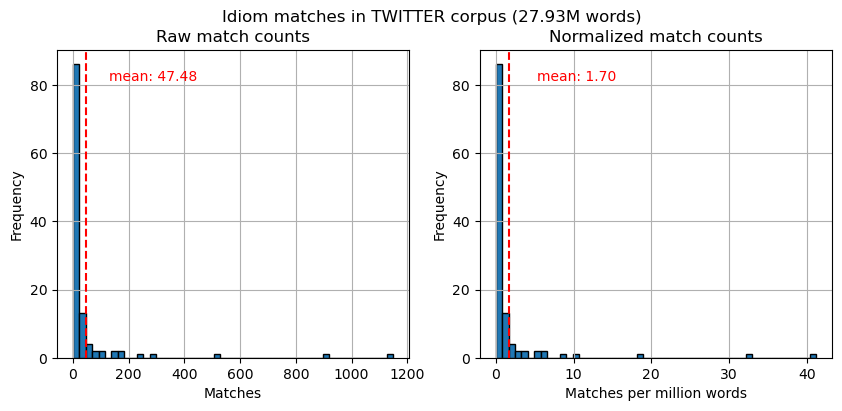

In [390]:
histCorpusMatches(*twitter_results, twitter_size, corpusName="TWITTER")

In [391]:
blogs_results = testCorpus(blogsTexts, idiom_list_confident, "BLOGS")

Testing 116 idioms on BLOGS corpus | 36.41M words
  0: Testing \blame ducks?\b                                    | 3.05 seconds |   11 matches ( 0.302 per million words)
  1: Testing \baxes? to grind\b                                 | 2.75 seconds |   23 matches ( 0.632 per million words)
  2: Testing \blow hanging fruits?\b                            | 2.68 seconds |    1 matches ( 0.027 per million words)
  3: Testing \bmuckrak(?:er|ers|ing|ed|e|es)\b                  | 2.74 seconds |    1 matches ( 0.027 per million words)
  4: Testing \blead (?:foot|feet)\b                             | 2.73 seconds |    2 matches ( 0.055 per million words)
  5: Testing \btrigger happy\b                                  | 2.87 seconds |    5 matches ( 0.137 per million words)
  6: Testing \bsilver linings?\b                                | 3.56 seconds |   71 matches ( 1.950 per million words)
  7: Testing \bdrop of a hat\b                                  | 3.82 seconds |   29 matches ( 0.796 p

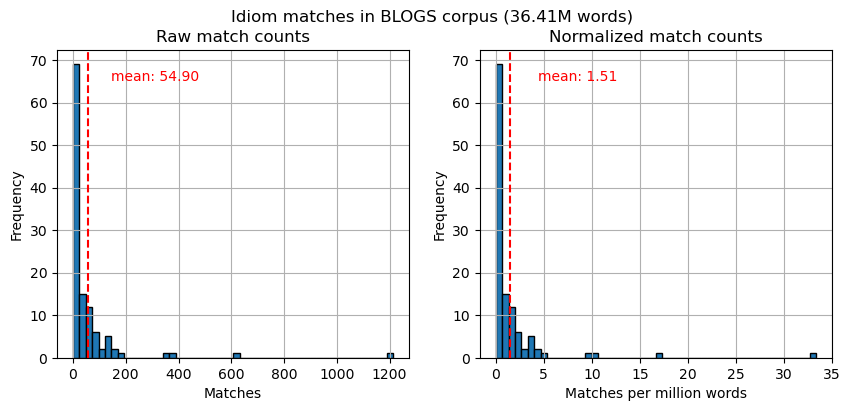

In [392]:
histCorpusMatches(*blogs_results, blogs_size, corpusName="BLOGS")

In [393]:
news_results = testCorpus(newsTexts, idiom_list_confident, "NEWS")

Testing 116 idioms on NEWS corpus | 33.34M words
  0: Testing \blame ducks?\b                                    | 3.24 seconds |   20 matches ( 0.600 per million words)
  1: Testing \baxes? to grind\b                                 | 3.26 seconds |    5 matches ( 0.150 per million words)
  2: Testing \blow hanging fruits?\b                            | 3.14 seconds |    1 matches ( 0.030 per million words)
  3: Testing \bmuckrak(?:er|ers|ing|ed|e|es)\b                  | 3.07 seconds |    7 matches ( 0.210 per million words)
  4: Testing \blead (?:foot|feet)\b                             | 2.76 seconds |    1 matches ( 0.030 per million words)
  5: Testing \btrigger happy\b                                  | 2.73 seconds |    0 matches ( 0.000 per million words)
  6: Testing \bsilver linings?\b                                | 2.66 seconds |   63 matches ( 1.890 per million words)
  7: Testing \bdrop of a hat\b                                  | 2.67 seconds |    3 matches ( 0.090 pe

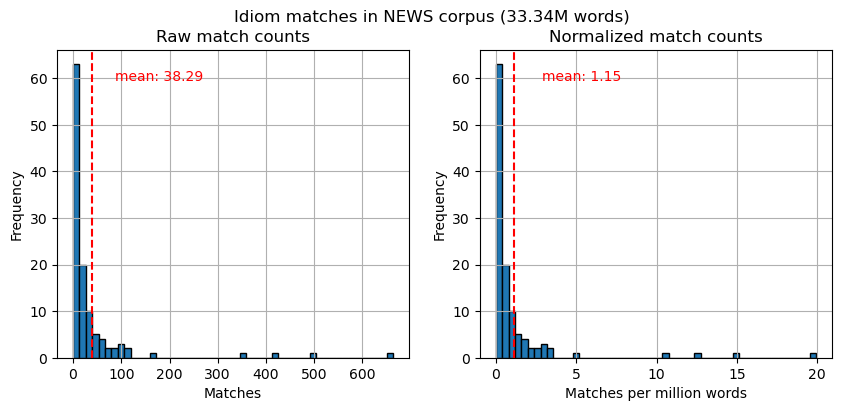

In [394]:
histCorpusMatches(*news_results, news_size, corpusName="NEWS")